# benchmarking on omnipath


In [1]:
from scprint2 import scPRINT2
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


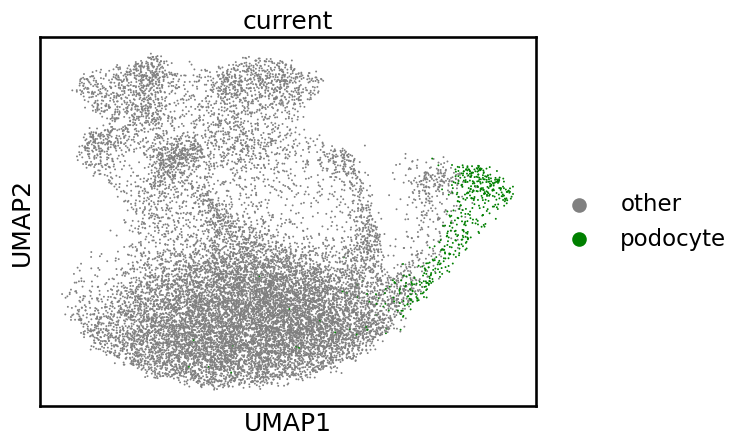

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


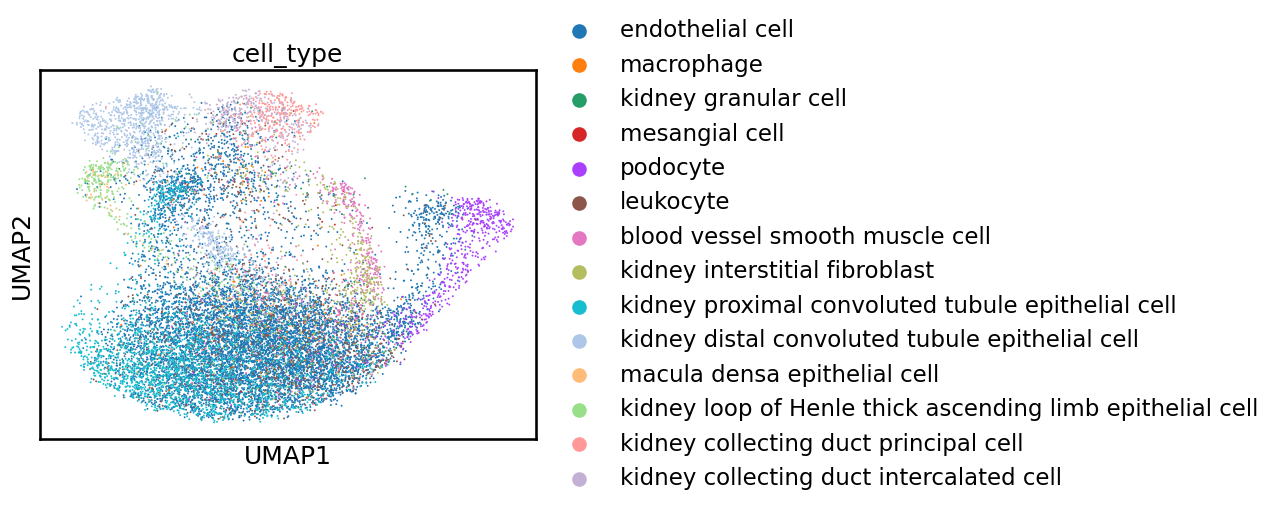

In [7]:
sc.pl.umap(adata, color=['cell_type'])

kidney distal convoluted tubule epithelial cell

View of AnnData object with n_obs × n_vars = 1024 × 4802
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_

Elapsed time: 86.40 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


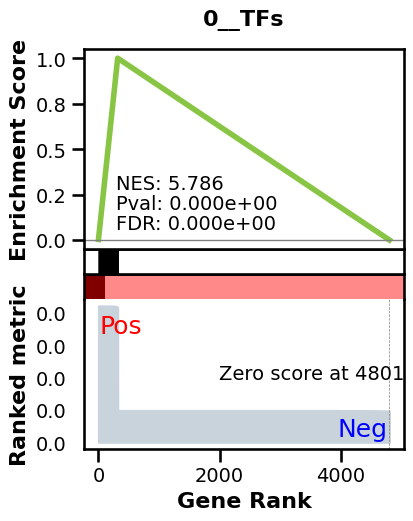

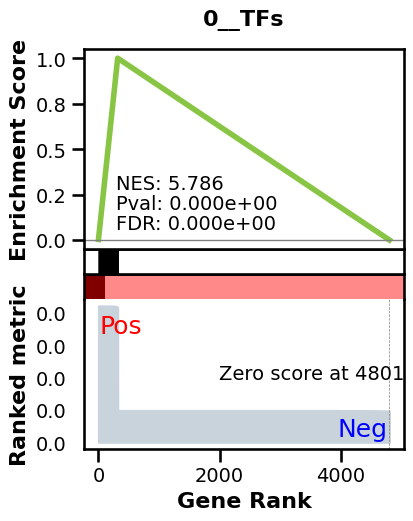

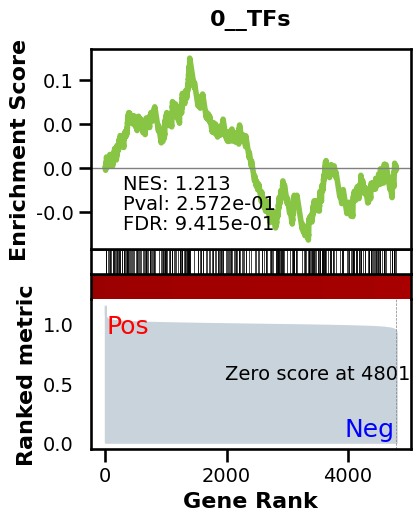

_________________________________________
TF specific enrichment


found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.001367301675574015 
recall:  0.09802998194804176 
random precision: 0.001085814360770578


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 47.34it/s]

  8%|▊         | 10/128 [00:00<00:02, 47.24it/s]

 12%|█▏        | 15/128 [00:00<00:02, 47.29it/s]

 16%|█▌        | 20/128 [00:00<00:02, 47.28it/s]

 20%|█▉        | 25/128 [00:00<00:02, 47.22it/s]

 23%|██▎       | 30/128 [00:00<00:02, 47.37it/s]

 27%|██▋       | 35/128 [00:00<00:01, 47.41it/s]

 31%|███▏      | 40/128 [00:00<00:01, 47.37it/s]

 35%|███▌      | 45/128 [00:00<00:01, 47.29it/s]

 39%|███▉      | 50/128 [00:01<00:01, 47.00it/s]

 43%|████▎     | 55/128 [00:01<00:01, 46.68it/s]

 47%|████▋     | 60/128 [00:01<00:01, 46.67it/s]

 51%|█████     | 65/128 [00:01<00:01, 46.70it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 46.78it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 46.89it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 46.92it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 46.91it/s]

 70%|███████   | 90/128 [00:01<00:00, 46.94it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 47.02it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 46.97it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 46.97it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 47.06it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 47.10it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 47.15it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 47.11it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.84it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011451348638748498
EPR: 1.8102713577453327


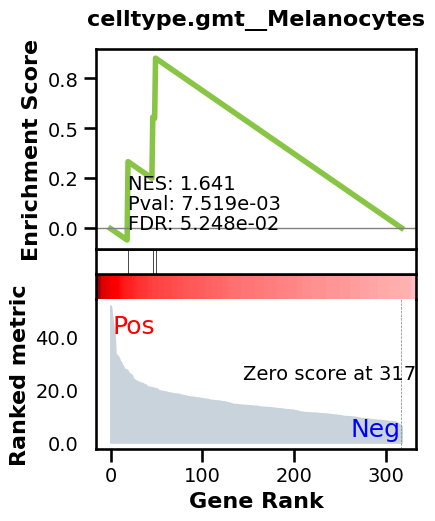

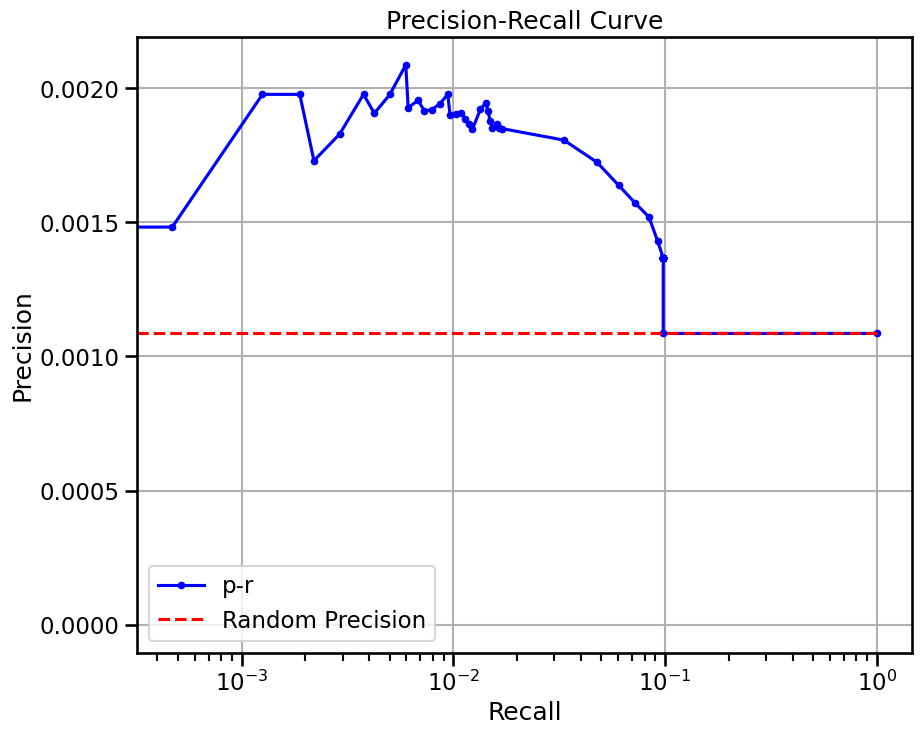

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 343.93 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


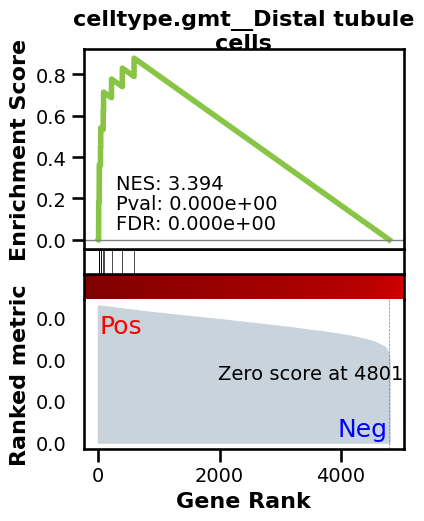

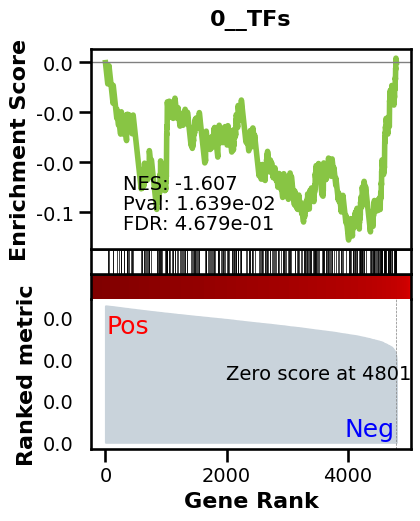

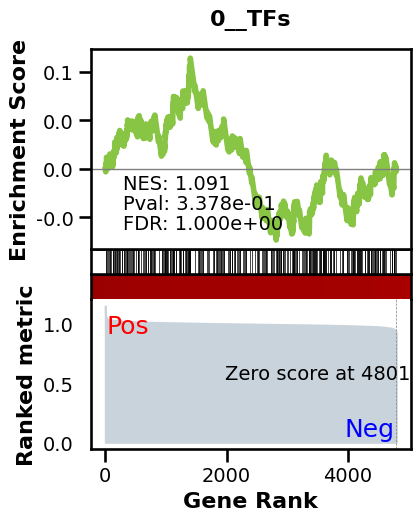

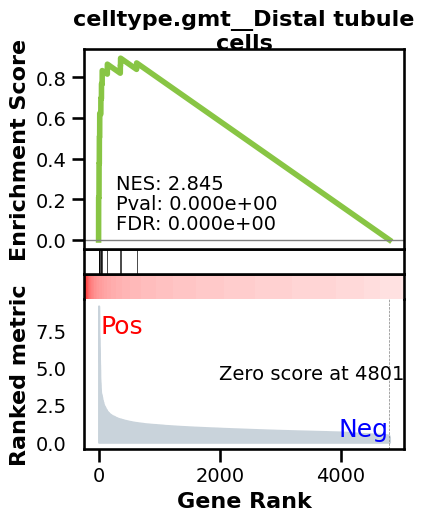

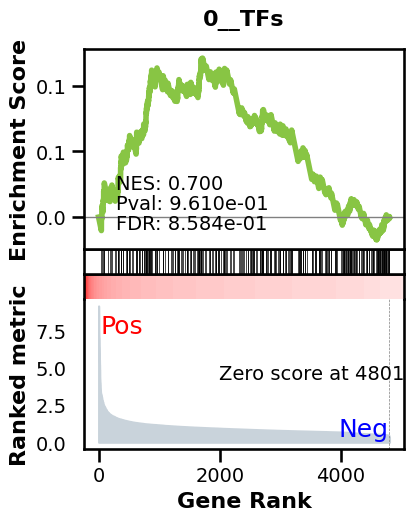

_________________________________________
TF specific enrichment


found some significant results for  3.225806451612903 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.0011204940027262564 
recall:  0.7354210815477592 
random precision: 0.001085814360770578


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 48.24it/s]

  8%|▊         | 10/128 [00:00<00:02, 48.45it/s]

 12%|█▏        | 15/128 [00:00<00:02, 48.54it/s]

 16%|█▌        | 20/128 [00:00<00:02, 48.70it/s]

 20%|█▉        | 25/128 [00:00<00:02, 48.81it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.83it/s]

 27%|██▋       | 35/128 [00:00<00:01, 48.82it/s]

 31%|███▏      | 40/128 [00:00<00:01, 48.80it/s]

 35%|███▌      | 45/128 [00:00<00:01, 48.88it/s]

 39%|███▉      | 50/128 [00:01<00:01, 48.87it/s]

 43%|████▎     | 55/128 [00:01<00:01, 48.80it/s]

 47%|████▋     | 60/128 [00:01<00:01, 48.81it/s]

 51%|█████     | 65/128 [00:01<00:01, 48.84it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 48.91it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 48.93it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 48.95it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 48.99it/s]

 70%|███████   | 90/128 [00:01<00:00, 47.81it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.17it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.41it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.55it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 48.59it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 48.73it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 48.80it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 48.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0011548953762579768
EPR: 1.4470782460292733


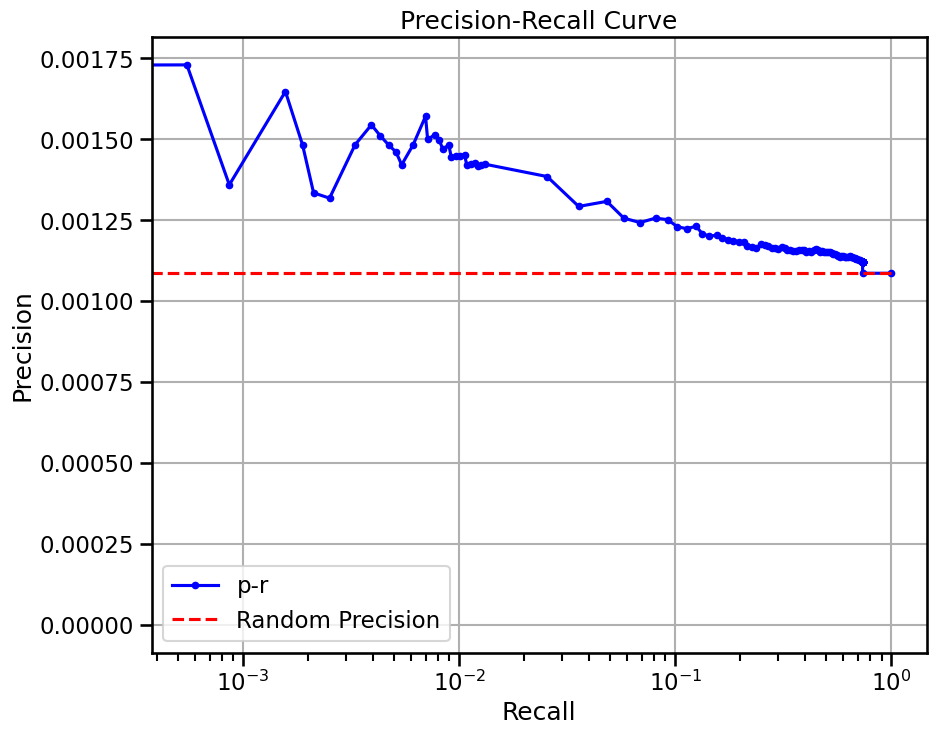

kidney loop of Henle thick ascending limb epithelial cell

View of AnnData object with n_obs × n_vars = 388 × 4745
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_h

Elapsed time: 44.42 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


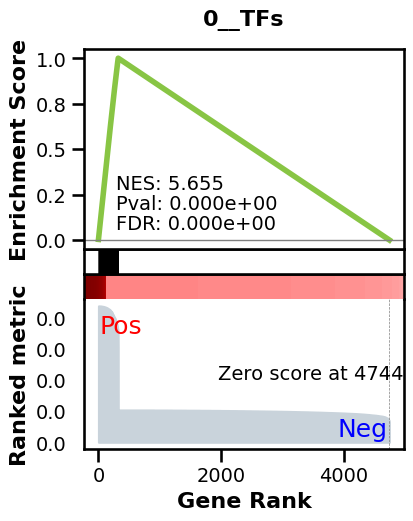

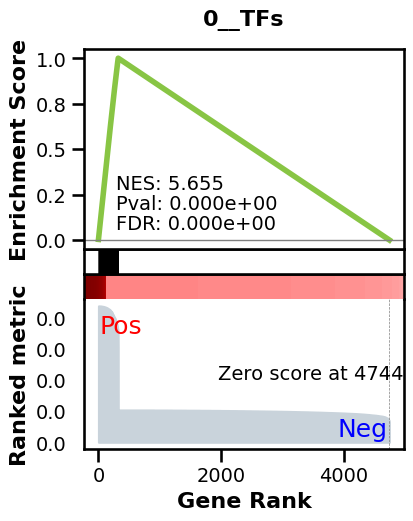

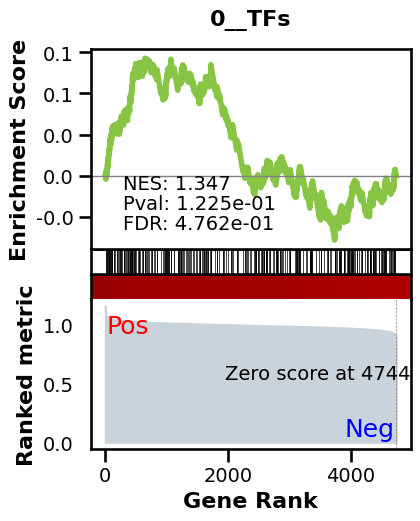

_________________________________________
TF specific enrichment


found some significant results for  5.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.0016283724732880382 
recall:  0.10699466508595139 
random precision: 0.0012108833796207323


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 50.13it/s]

  9%|▉         | 12/128 [00:00<00:02, 50.02it/s]

 14%|█▍        | 18/128 [00:00<00:02, 49.96it/s]

 18%|█▊        | 23/128 [00:00<00:02, 49.96it/s]

 22%|██▏       | 28/128 [00:00<00:02, 49.96it/s]

 27%|██▋       | 34/128 [00:00<00:01, 49.98it/s]

 30%|███       | 39/128 [00:00<00:01, 49.88it/s]

 35%|███▌      | 45/128 [00:00<00:01, 50.01it/s]

 40%|███▉      | 51/128 [00:01<00:01, 50.09it/s]

 45%|████▍     | 57/128 [00:01<00:01, 50.02it/s]

 49%|████▉     | 63/128 [00:01<00:01, 49.84it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 49.84it/s]

 57%|█████▋    | 73/128 [00:01<00:01, 49.78it/s]

 61%|██████    | 78/128 [00:01<00:01, 49.73it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 49.77it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 49.90it/s]

 73%|███████▎  | 94/128 [00:01<00:00, 49.80it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 49.84it/s]

 81%|████████▏ | 104/128 [00:02<00:00, 49.85it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 49.94it/s]

 91%|█████████ | 116/128 [00:02<00:00, 50.01it/s]

 95%|█████████▌| 122/128 [00:02<00:00, 49.93it/s]

 99%|█████████▉| 127/128 [00:02<00:00, 49.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.85it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00127315199940872
EPR: 1.777899166116973


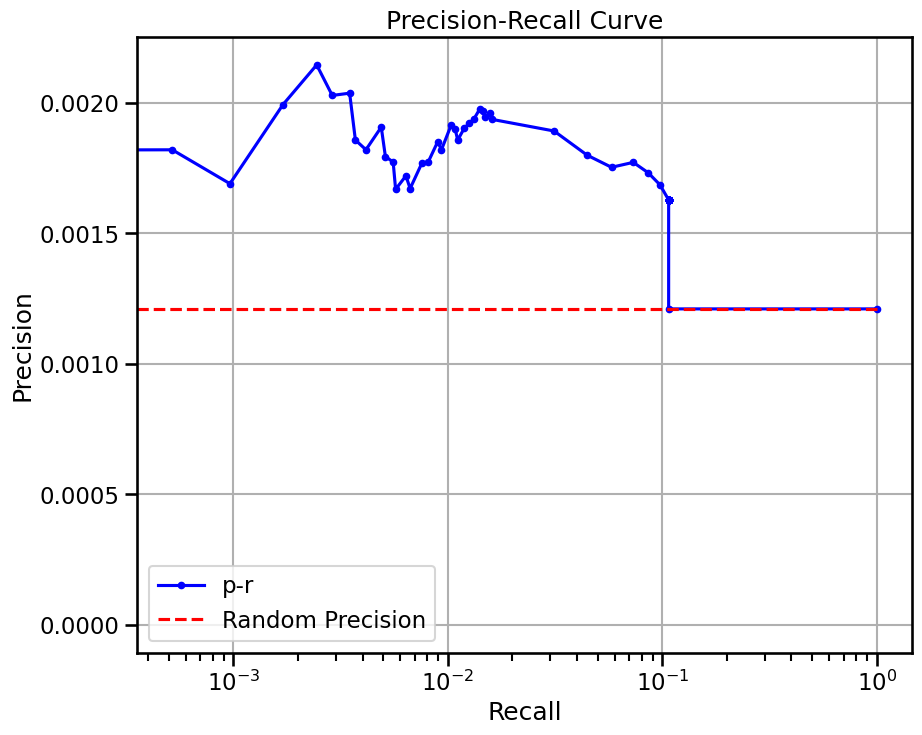

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 89.24 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


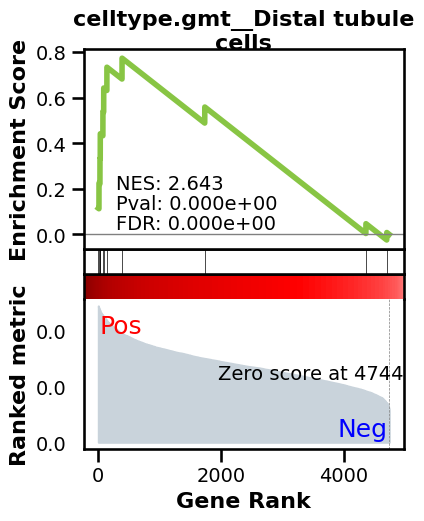

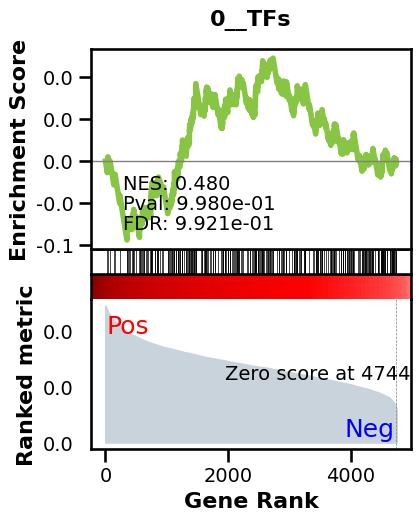

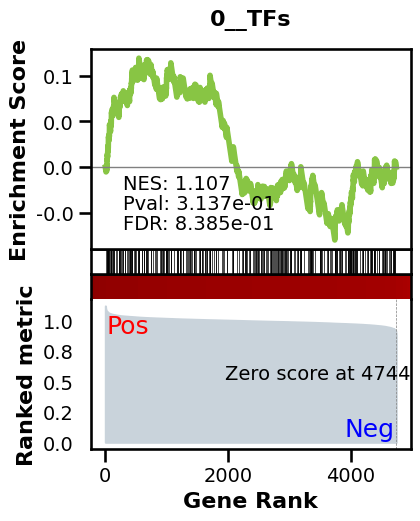

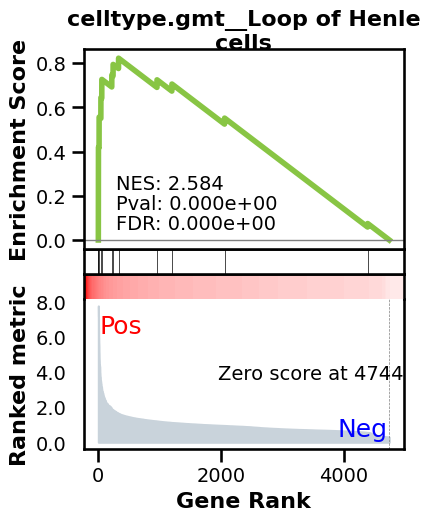

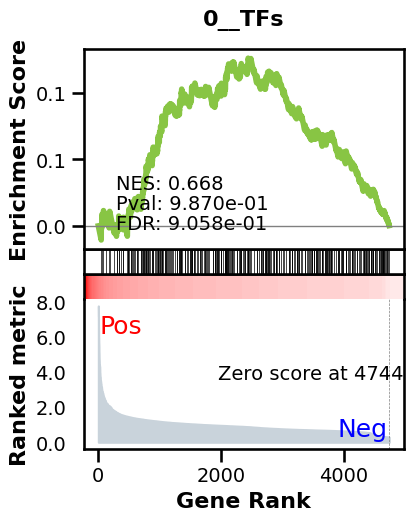

_________________________________________
TF specific enrichment


found some significant results for  5.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.0012743602696873725 
recall:  0.38878186129223474 
random precision: 0.0012108833796207323


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.13it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.17it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.24it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.32it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.43it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.34it/s]

 27%|██▋       | 35/128 [00:00<00:01, 49.32it/s]

 31%|███▏      | 40/128 [00:00<00:01, 49.39it/s]

 35%|███▌      | 45/128 [00:00<00:01, 49.40it/s]

 39%|███▉      | 50/128 [00:01<00:01, 49.36it/s]

 43%|████▎     | 55/128 [00:01<00:01, 49.35it/s]

 47%|████▋     | 60/128 [00:01<00:01, 49.39it/s]

 51%|█████     | 65/128 [00:01<00:01, 49.42it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 49.38it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 49.42it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 49.38it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 49.28it/s]

 70%|███████   | 90/128 [00:01<00:00, 49.25it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 49.14it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.89it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.89it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 49.02it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 49.17it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 49.19it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 49.23it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.25it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012491371714343446
EPR: 0.5501256083253464


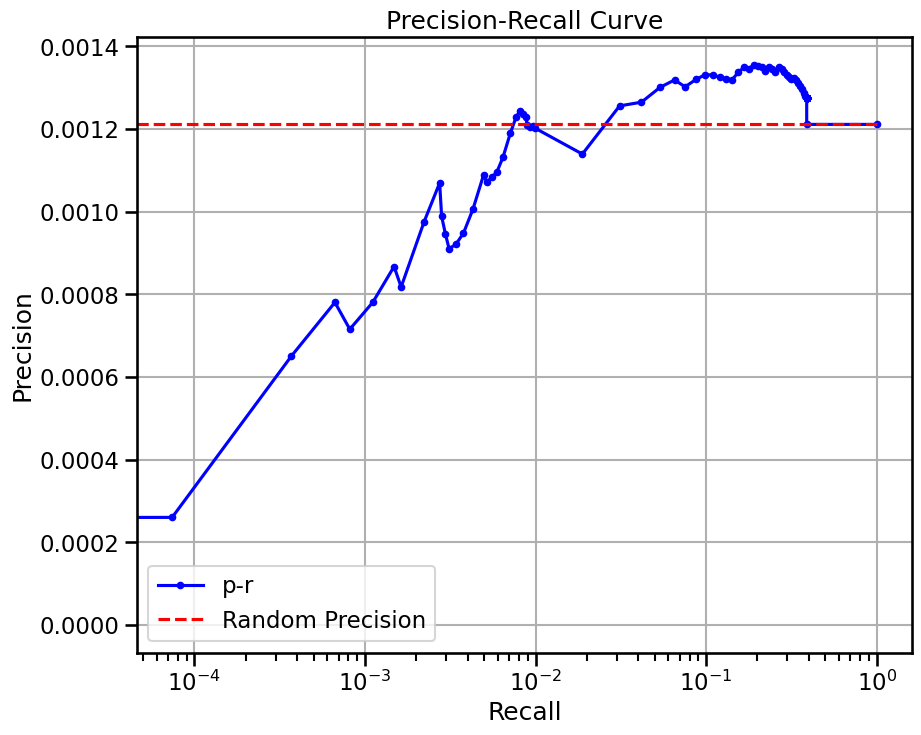

kidney collecting duct principal cell

View of AnnData object with n_obs × n_vars = 455 × 4848
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb',

Elapsed time: 52.21 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


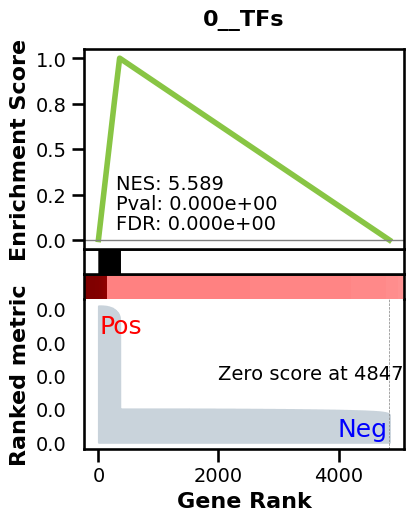

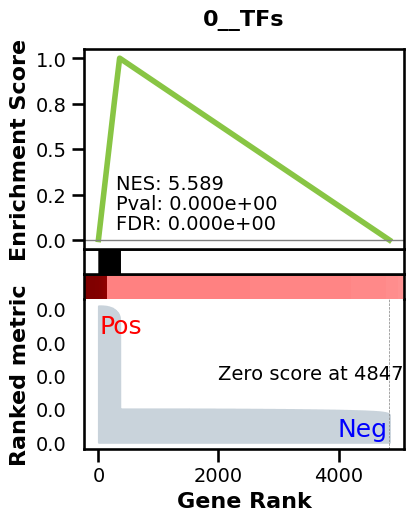

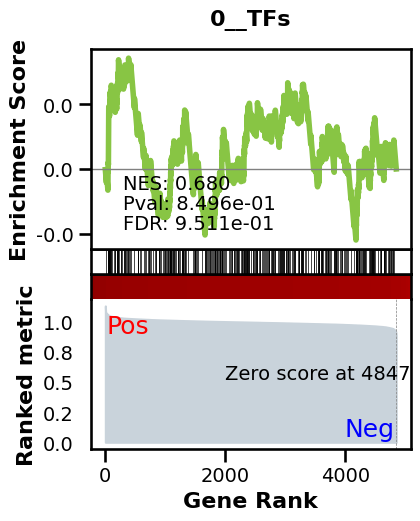

_________________________________________
TF specific enrichment


found some significant results for  1.4285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.002136242911492355 
recall:  0.13090909090909092 
random precision: 0.0013922345159841588


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 44.57it/s]

  8%|▊         | 10/128 [00:00<00:02, 44.56it/s]

 12%|█▏        | 15/128 [00:00<00:02, 44.71it/s]

 16%|█▌        | 20/128 [00:00<00:02, 44.85it/s]

 20%|█▉        | 25/128 [00:00<00:02, 44.95it/s]

 23%|██▎       | 30/128 [00:00<00:02, 45.15it/s]

 27%|██▋       | 35/128 [00:00<00:02, 45.21it/s]

 31%|███▏      | 40/128 [00:00<00:01, 45.33it/s]

 35%|███▌      | 45/128 [00:00<00:01, 45.48it/s]

 39%|███▉      | 50/128 [00:01<00:01, 45.54it/s]

 43%|████▎     | 55/128 [00:01<00:01, 45.38it/s]

 47%|████▋     | 60/128 [00:01<00:01, 45.39it/s]

 51%|█████     | 65/128 [00:01<00:01, 45.45it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 45.52it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 45.53it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 45.59it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 45.61it/s]

 70%|███████   | 90/128 [00:01<00:00, 45.62it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 45.65it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 45.65it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 45.68it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 45.72it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 45.71it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 45.77it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 45.68it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.45it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015481062802255936
EPR: 2.49584293001144


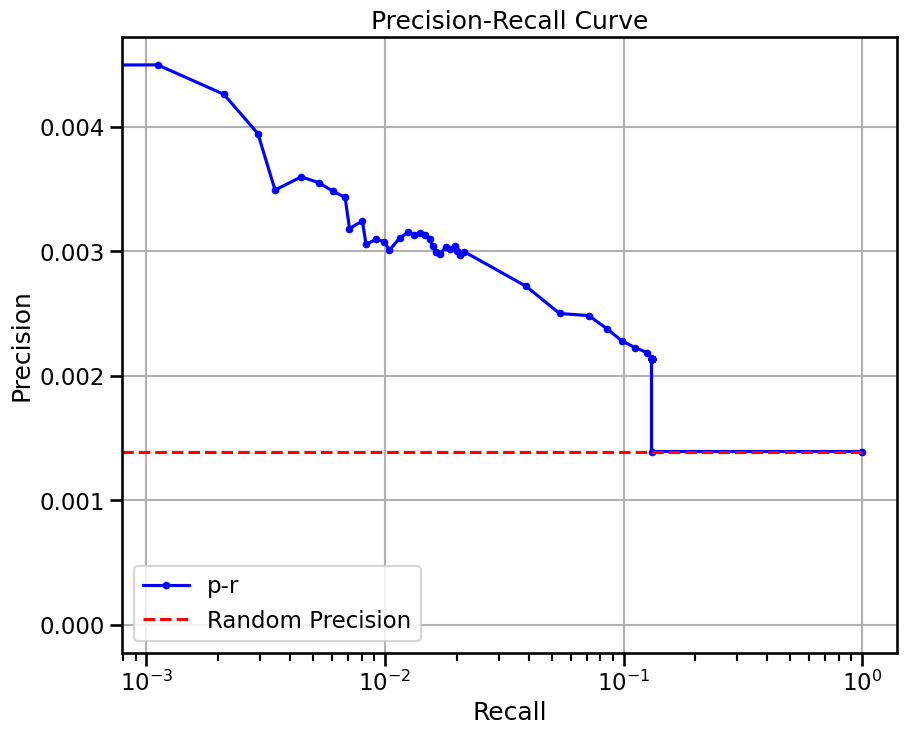

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 123.27 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


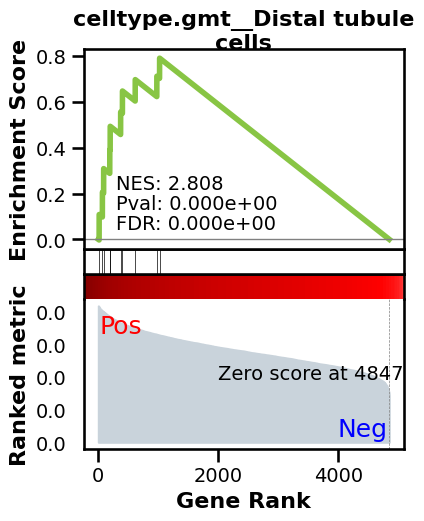

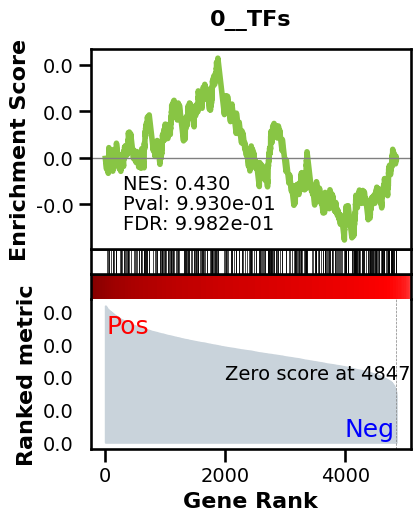

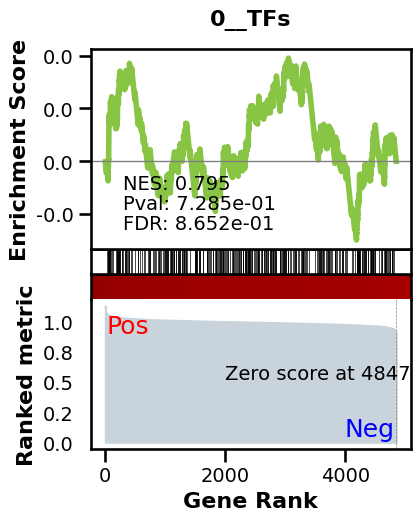

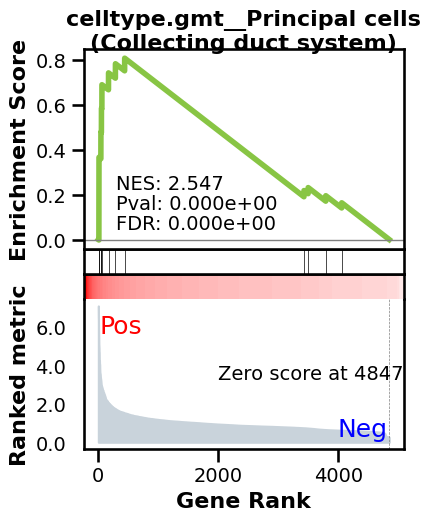

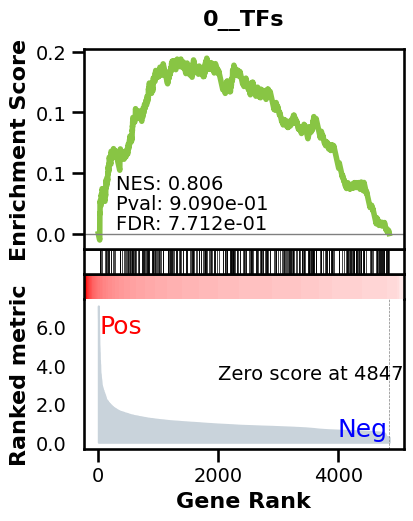

_________________________________________
TF specific enrichment


found some significant results for  4.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.0015749117927651806 
recall:  0.5235190615835777 
random precision: 0.0013922345159841588


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.37it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.53it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.48it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.61it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.69it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.67it/s]

 27%|██▋       | 35/128 [00:00<00:02, 43.63it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.73it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.76it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.79it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.85it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.75it/s]

 51%|█████     | 65/128 [00:01<00:01, 43.77it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 43.71it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 43.72it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 43.73it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 43.79it/s]

 70%|███████   | 90/128 [00:02<00:00, 43.67it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 43.74it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.68it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 43.78it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 43.80it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.86it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.79it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.84it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.72it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014640014522605384


EPR: 1.349382576688967


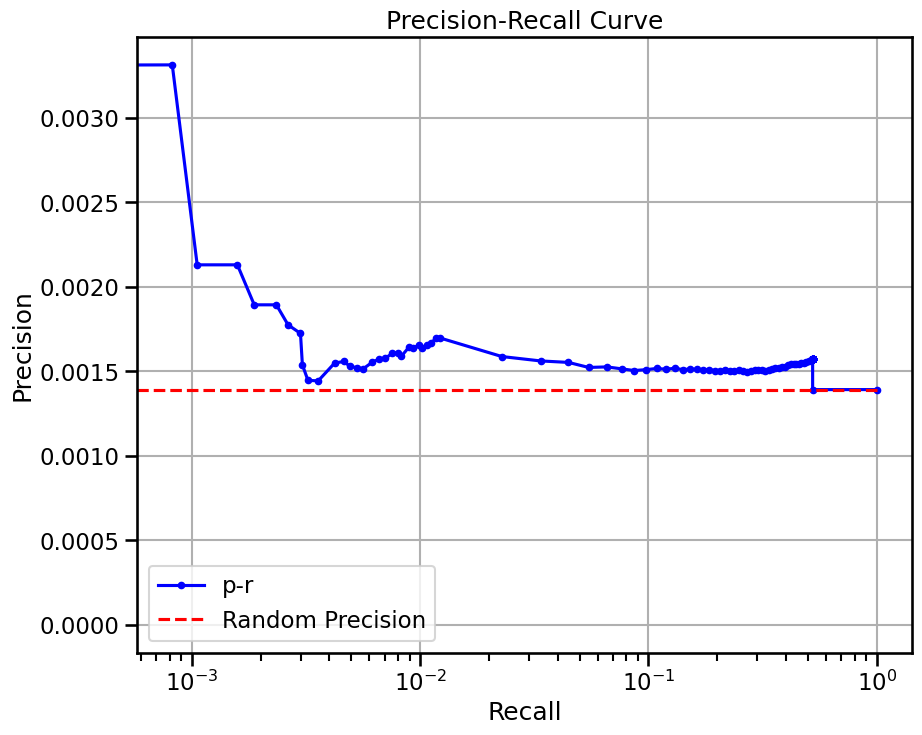

mesangial cell

View of AnnData object with n_obs × n_vars = 10 × 3799
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'

Elapsed time: 24.87 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


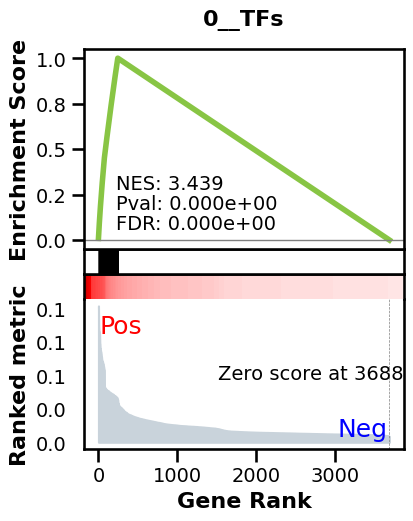

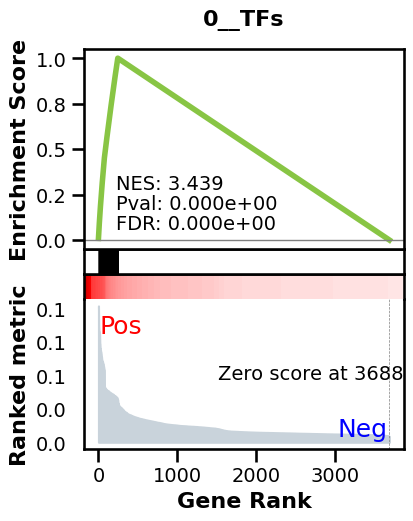

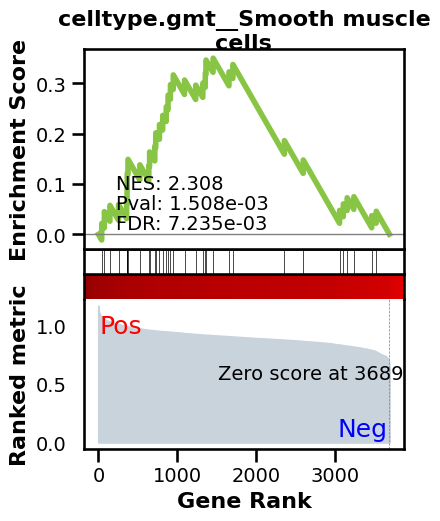

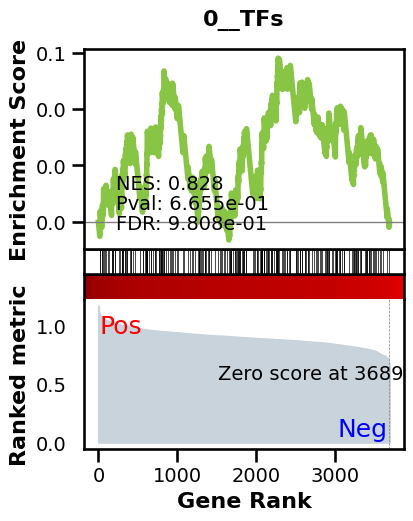

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.0026555144526729103 
recall:  0.04292436589004935 
random precision: 0.0012226661221992553


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 77.93it/s]

 12%|█▎        | 16/128 [00:00<00:01, 78.12it/s]

 19%|█▉        | 24/128 [00:00<00:01, 78.32it/s]

 25%|██▌       | 32/128 [00:00<00:01, 77.96it/s]

 31%|███▏      | 40/128 [00:00<00:01, 78.00it/s]

 38%|███▊      | 48/128 [00:00<00:01, 77.89it/s]

 44%|████▍     | 56/128 [00:00<00:00, 77.77it/s]

 50%|█████     | 64/128 [00:00<00:00, 77.82it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 77.90it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 77.87it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 78.10it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 78.13it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 78.19it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 78.02it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 78.09it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:01<00:00, 78.06it/s]

100%|██████████| 128/128 [00:01<00:00, 77.98it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012785711503560586
EPR: 1.9759578791845451


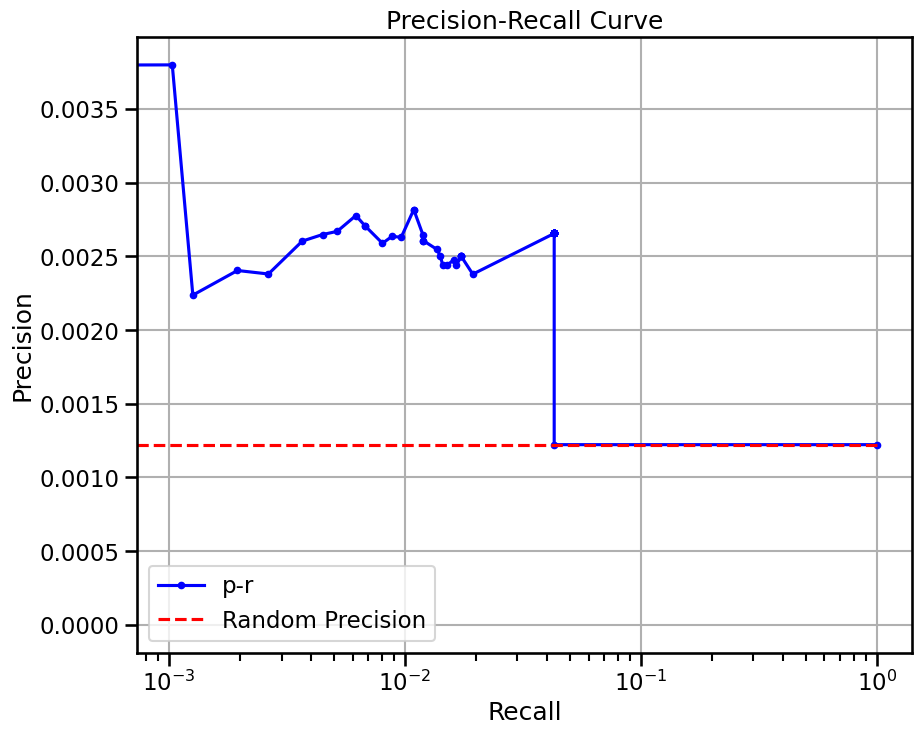

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 25.76 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


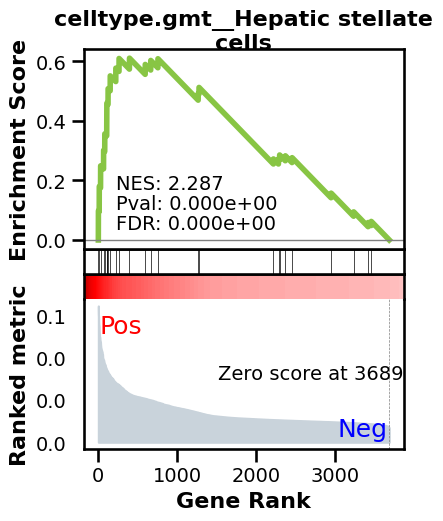

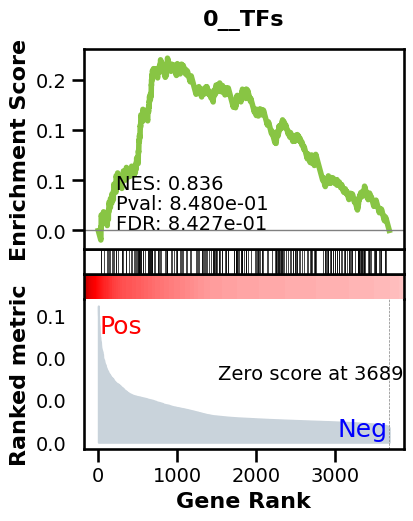

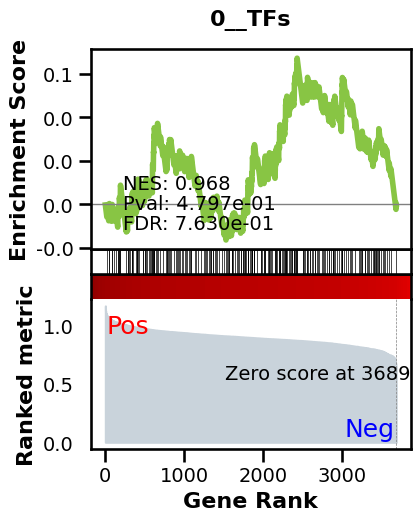

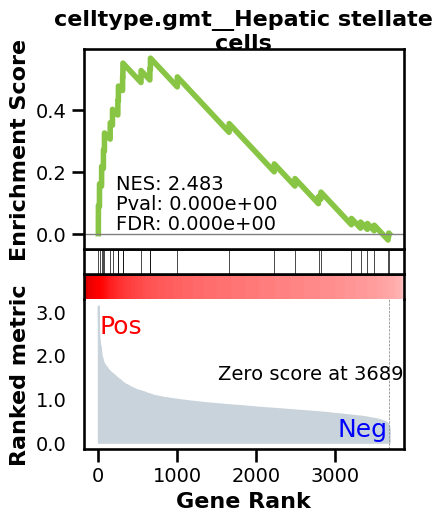

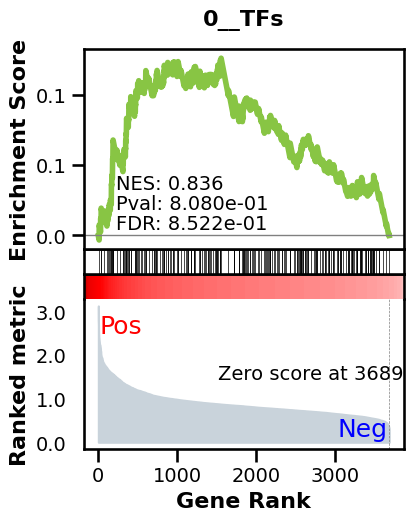

_________________________________________
TF specific enrichment


found some significant results for  7.142857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.001785703796382775 
recall:  0.034890393664639044 
random precision: 0.0012226661221992553


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 78.65it/s]

 12%|█▎        | 16/128 [00:00<00:01, 78.80it/s]

 19%|█▉        | 24/128 [00:00<00:01, 78.47it/s]

 25%|██▌       | 32/128 [00:00<00:01, 78.36it/s]

 31%|███▏      | 40/128 [00:00<00:01, 78.38it/s]

 38%|███▊      | 48/128 [00:00<00:01, 78.58it/s]

 44%|████▍     | 56/128 [00:00<00:00, 78.46it/s]

 50%|█████     | 64/128 [00:00<00:00, 78.38it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 78.30it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 78.46it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 78.46it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 77.99it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 78.25it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 78.41it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 78.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:01<00:00, 78.29it/s]

100%|██████████| 128/128 [00:01<00:00, 78.35it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001235603637268225
EPR: 1.2209620953890872


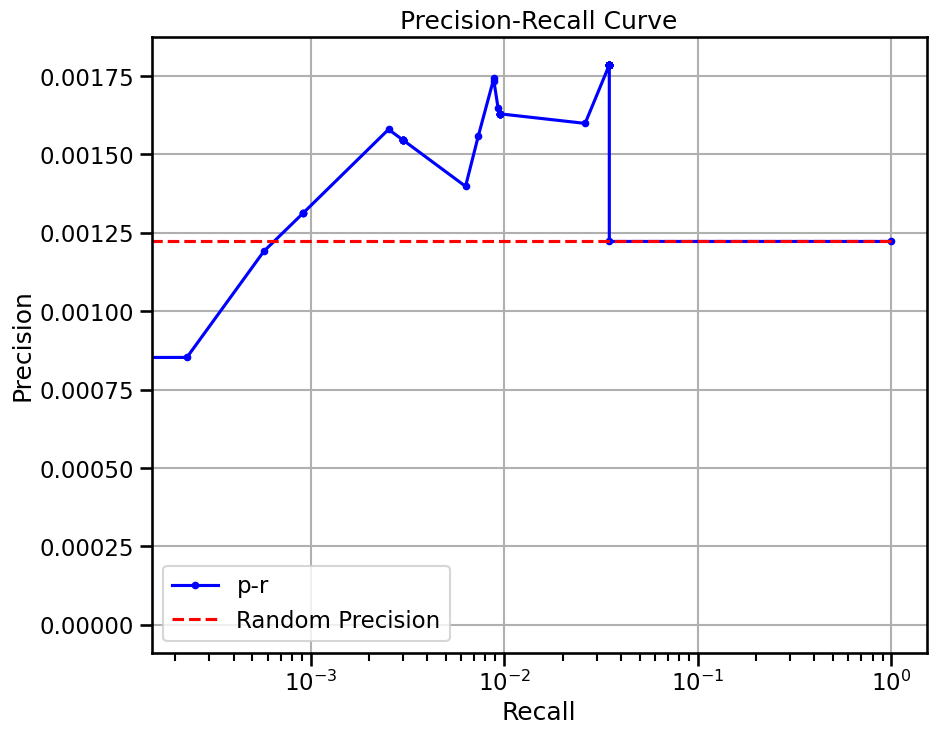

blood vessel smooth muscle cell

View of AnnData object with n_obs × n_vars = 462 × 4402
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outl

Elapsed time: 42.01 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


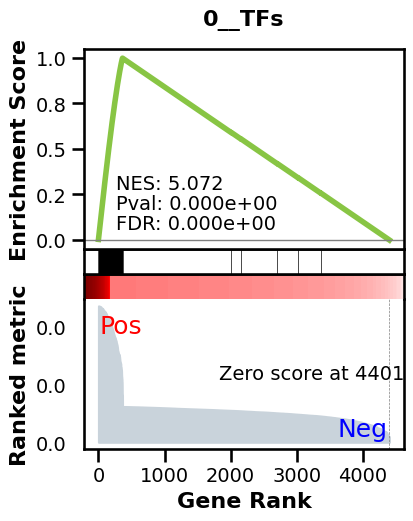

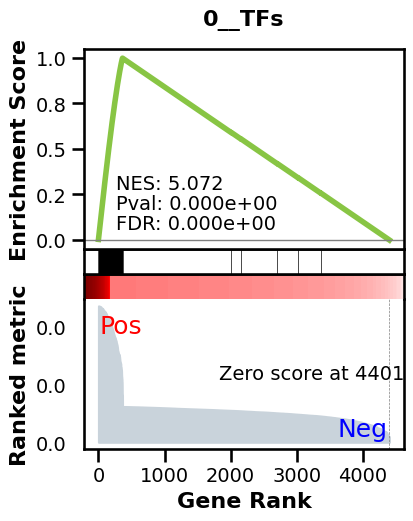

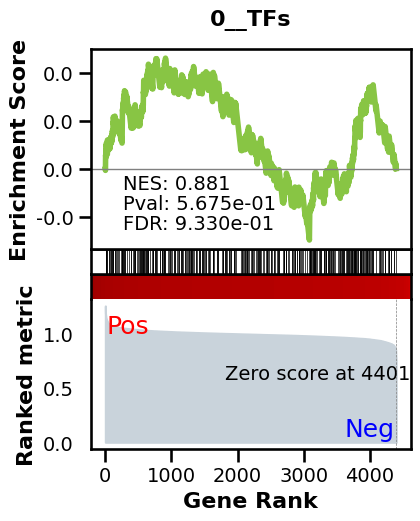

_________________________________________
TF specific enrichment


found some significant results for  1.8867924528301887 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.002705923808401352 
recall:  0.13279820574868678 
random precision: 0.001644809332009176


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 51.77it/s]

  9%|▉         | 12/128 [00:00<00:02, 51.78it/s]

 14%|█▍        | 18/128 [00:00<00:02, 51.75it/s]

 19%|█▉        | 24/128 [00:00<00:02, 51.90it/s]

 23%|██▎       | 30/128 [00:00<00:01, 51.95it/s]

 28%|██▊       | 36/128 [00:00<00:01, 51.98it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.01it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.02it/s]

 42%|████▏     | 54/128 [00:01<00:01, 51.92it/s]

 47%|████▋     | 60/128 [00:01<00:01, 51.96it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 51.27it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 51.43it/s]

 61%|██████    | 78/128 [00:01<00:00, 51.59it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 51.65it/s]

 70%|███████   | 90/128 [00:01<00:00, 51.78it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 51.78it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 51.71it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 51.72it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 51.74it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 51.80it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 51.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 51.75it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018540087785159855
EPR: 2.3427064446002785


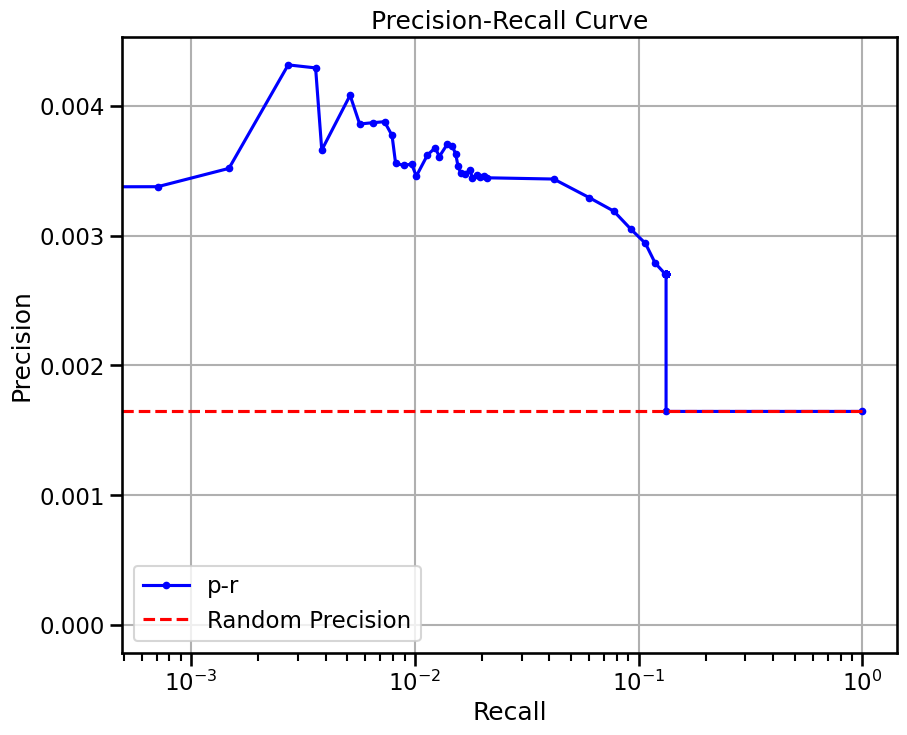

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 68.67 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


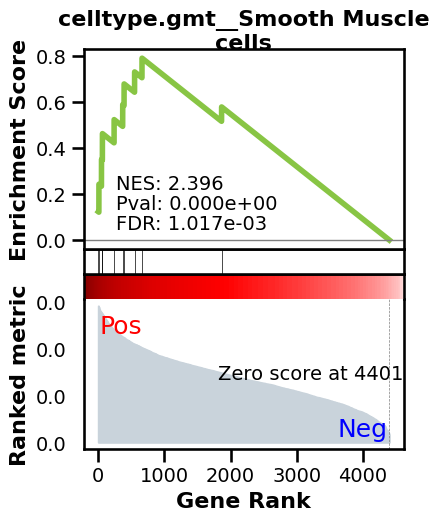

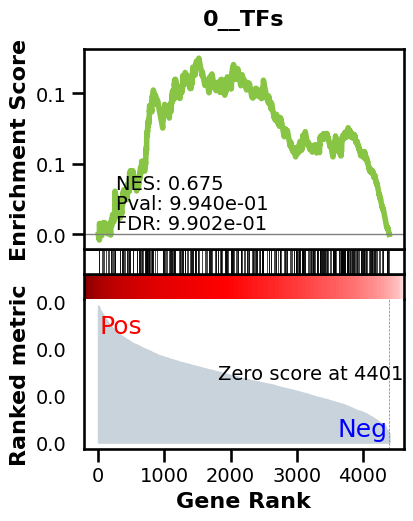

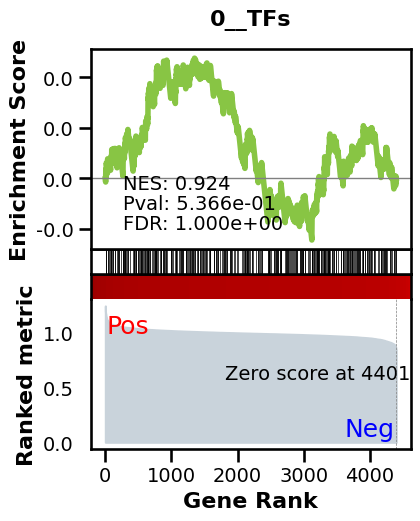

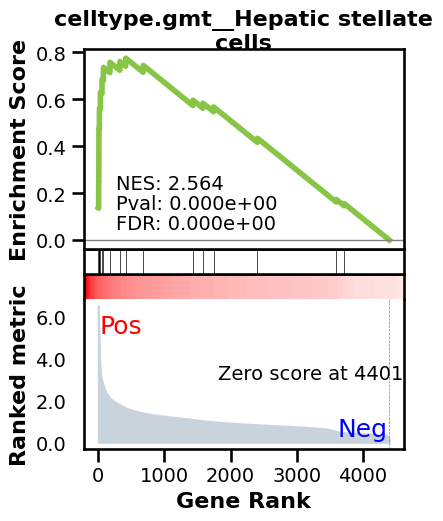

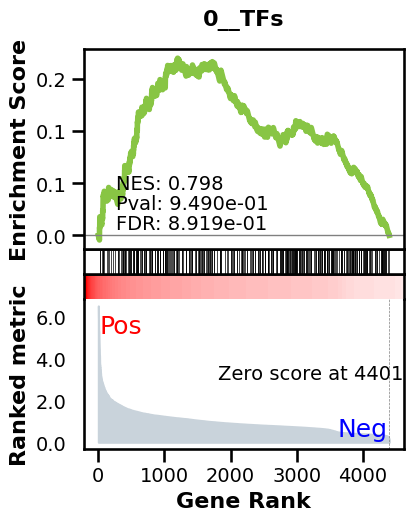

_________________________________________
TF specific enrichment


found some significant results for  1.8867924528301887 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.0021456762742684526 
recall:  0.3737826831139704 
random precision: 0.001644809332009176


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.10it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.18it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.07it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.11it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.05it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.04it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.10it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.20it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.17it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.10it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.19it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.18it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.10it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.19it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.15it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.07it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.10it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.08it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.16it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.02it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 51.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 51.98it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017901647575471152
EPR: 1.148831894167184


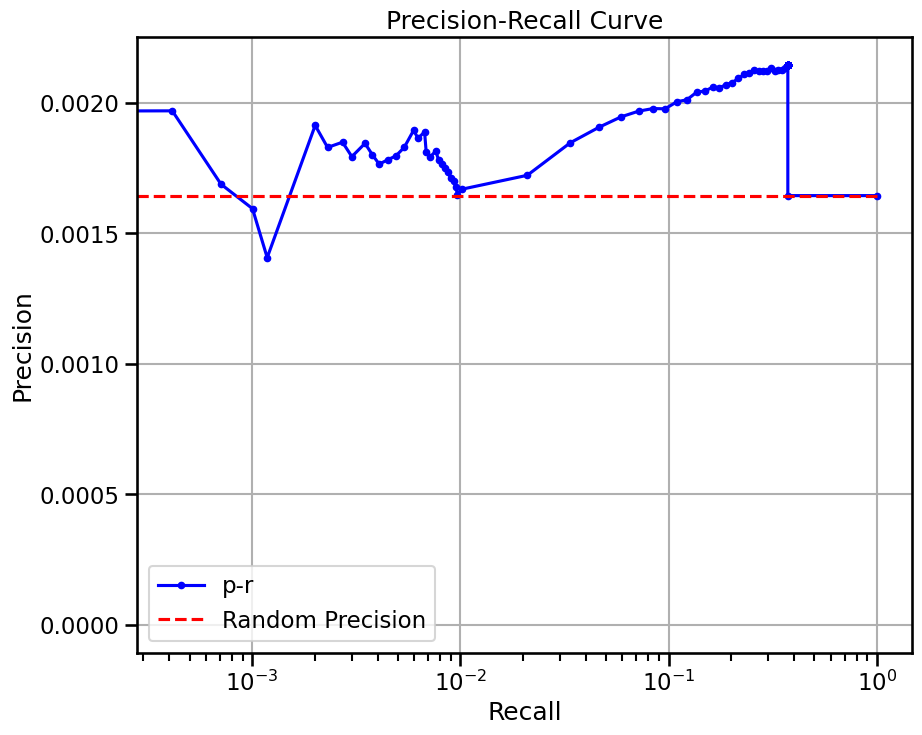

podocyte

View of AnnData object with n_obs × n_vars = 518 × 4839
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'le

Elapsed time: 52.47 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


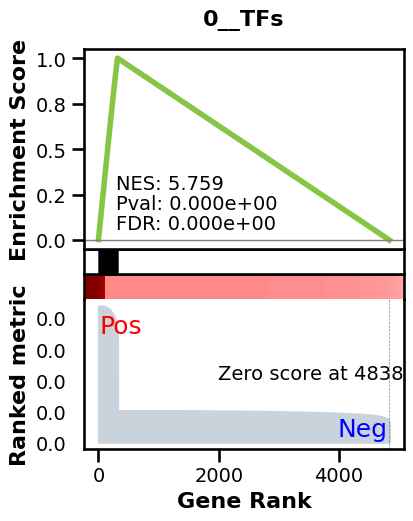

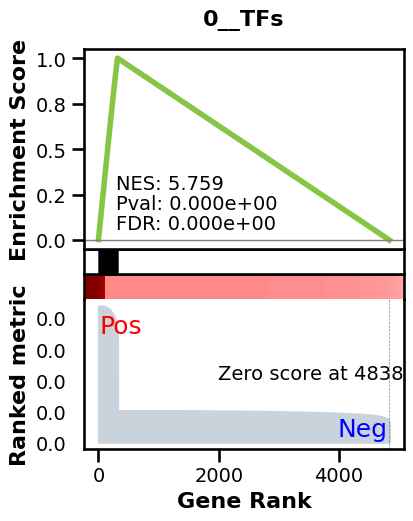

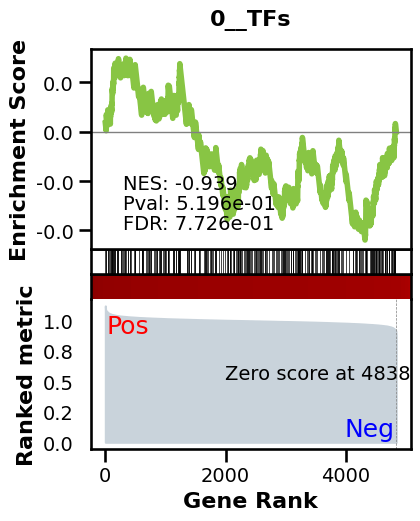

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.00219523755115168 
recall:  0.11220461796355377 
random precision: 0.0015213461490683946


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.79it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.96it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.96it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.79it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.82it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.83it/s]

 27%|██▋       | 35/128 [00:00<00:02, 43.84it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.80it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.88it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.81it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.84it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.84it/s]

 51%|█████     | 65/128 [00:01<00:01, 43.85it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 43.88it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 43.88it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 43.82it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 43.78it/s]

 70%|███████   | 90/128 [00:02<00:00, 43.88it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 43.88it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.92it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 43.93it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 43.85it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.86it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.37it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.48it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.77it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00160718261622036
EPR: 1.387844674820196


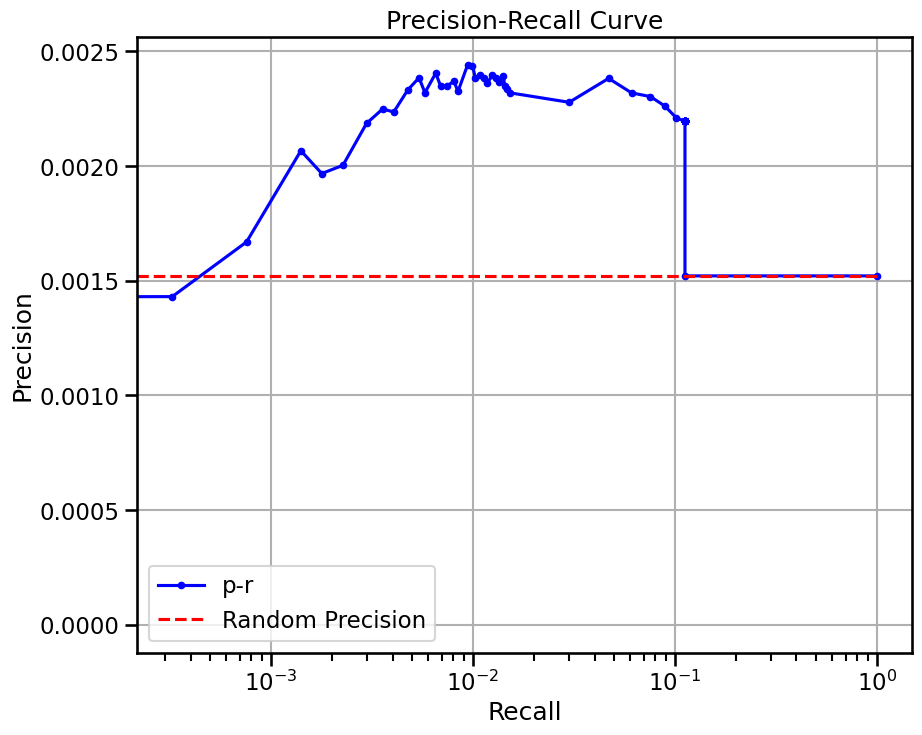

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 121.83 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


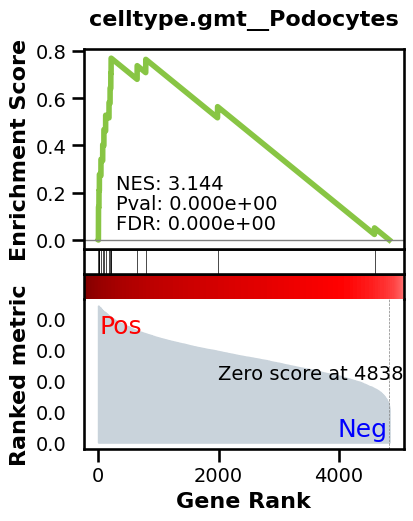

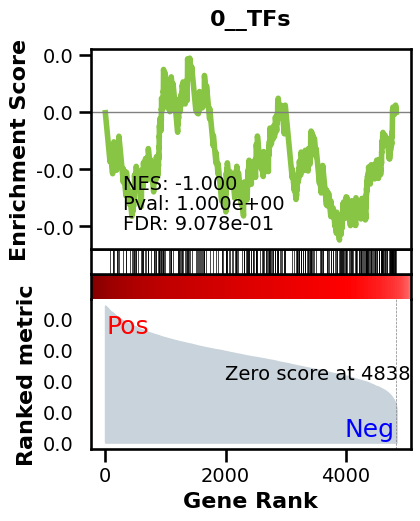

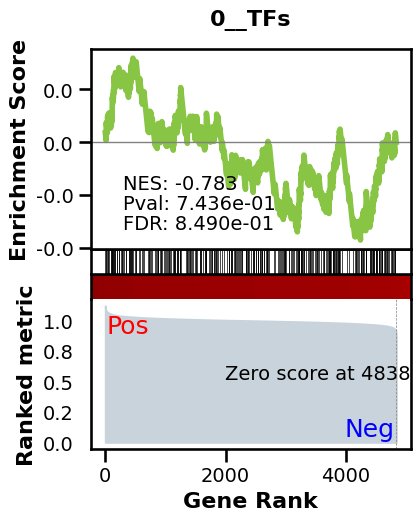

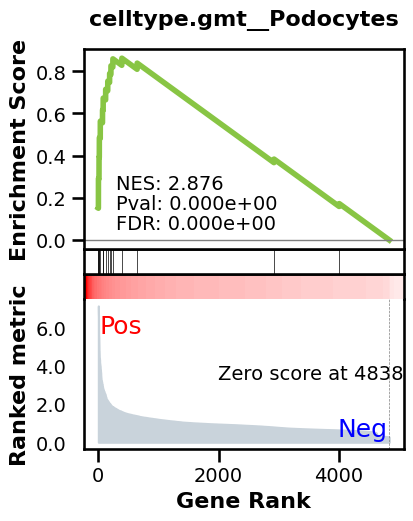

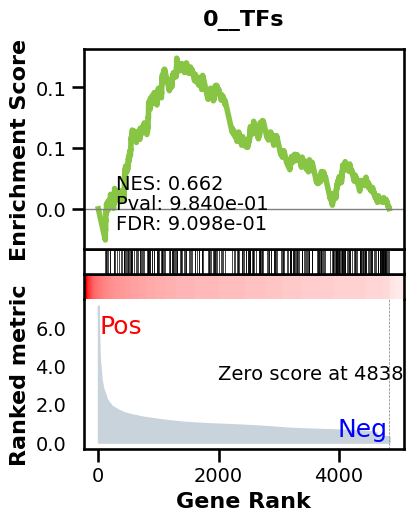

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.0016093458303662502 
recall:  0.4521710917644514 
random precision: 0.0015213461490683946


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 43.70it/s]

  8%|▊         | 10/128 [00:00<00:02, 43.70it/s]

 12%|█▏        | 15/128 [00:00<00:02, 43.64it/s]

 16%|█▌        | 20/128 [00:00<00:02, 43.65it/s]

 20%|█▉        | 25/128 [00:00<00:02, 43.69it/s]

 23%|██▎       | 30/128 [00:00<00:02, 43.64it/s]

 27%|██▋       | 35/128 [00:00<00:02, 43.70it/s]

 31%|███▏      | 40/128 [00:00<00:02, 43.69it/s]

 35%|███▌      | 45/128 [00:01<00:01, 43.67it/s]

 39%|███▉      | 50/128 [00:01<00:01, 43.64it/s]

 43%|████▎     | 55/128 [00:01<00:01, 43.59it/s]

 47%|████▋     | 60/128 [00:01<00:01, 43.63it/s]

 51%|█████     | 65/128 [00:01<00:01, 43.65it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 43.58it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 43.51it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 43.51it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 43.54it/s]

 70%|███████   | 90/128 [00:02<00:00, 43.55it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 43.55it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 43.57it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 43.61it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 43.56it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 43.54it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 43.59it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 43.63it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.59it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001589899193988508


EPR: 1.1735662743022013


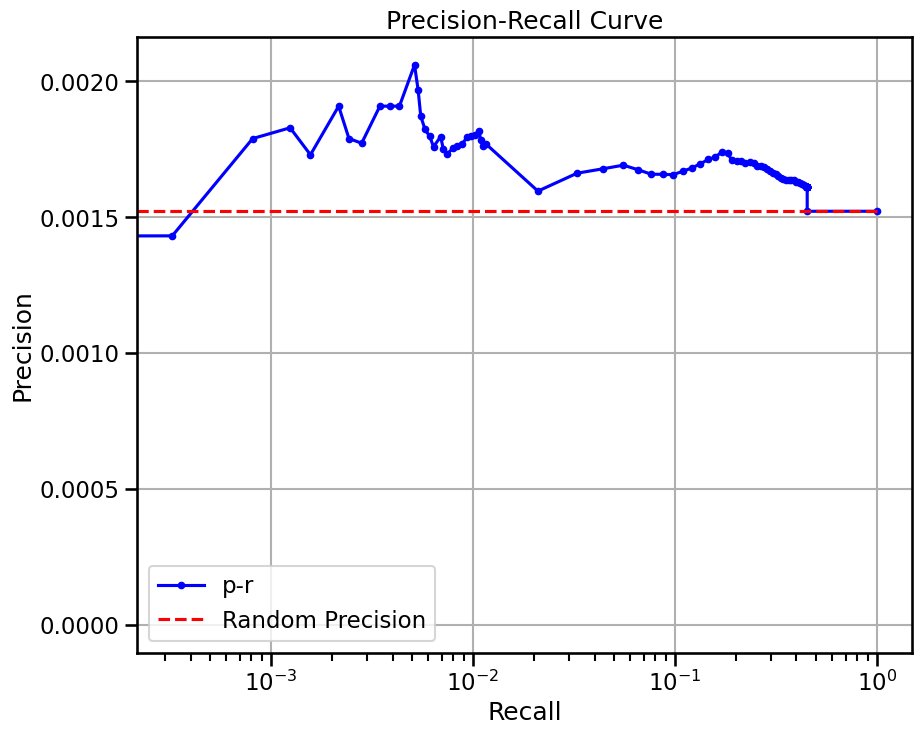

macrophage

View of AnnData object with n_obs × n_vars = 88 × 4403
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'l

Elapsed time: 30.99 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


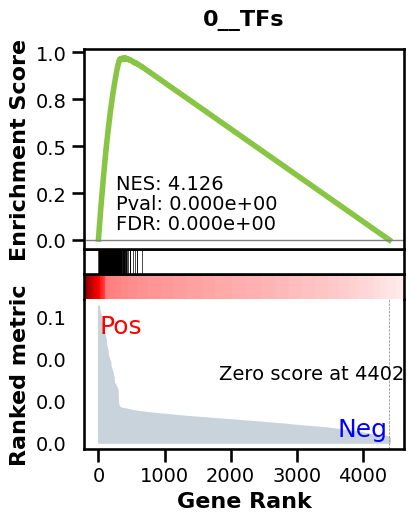

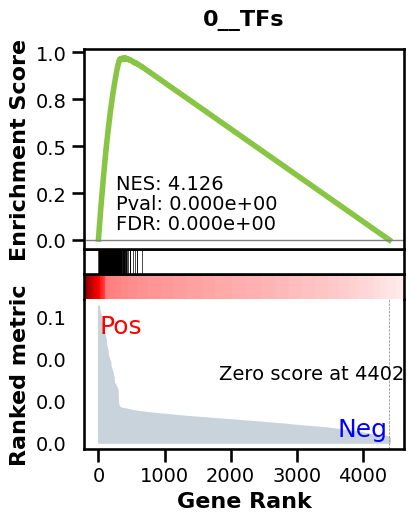

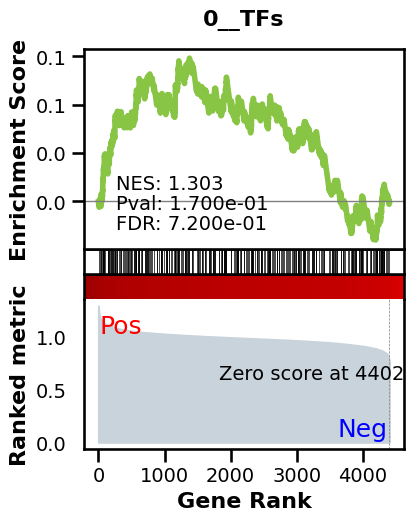

_________________________________________
TF specific enrichment


found some significant results for  4.878048780487805 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.002413006417970317 
recall:  0.08300991806813282 
random precision: 0.001400933069350315


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.70it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.61it/s]

 14%|█▍        | 18/128 [00:00<00:02, 54.49it/s]

 19%|█▉        | 24/128 [00:00<00:01, 54.58it/s]

 23%|██▎       | 30/128 [00:00<00:01, 54.61it/s]

 28%|██▊       | 36/128 [00:00<00:01, 54.71it/s]

 33%|███▎      | 42/128 [00:00<00:01, 54.71it/s]

 38%|███▊      | 48/128 [00:00<00:01, 54.67it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.80it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.88it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.91it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.02it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.26it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.37it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.72it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.99it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.29it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.55it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.80it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.85it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014862078199925372
EPR: 1.4382057024536892


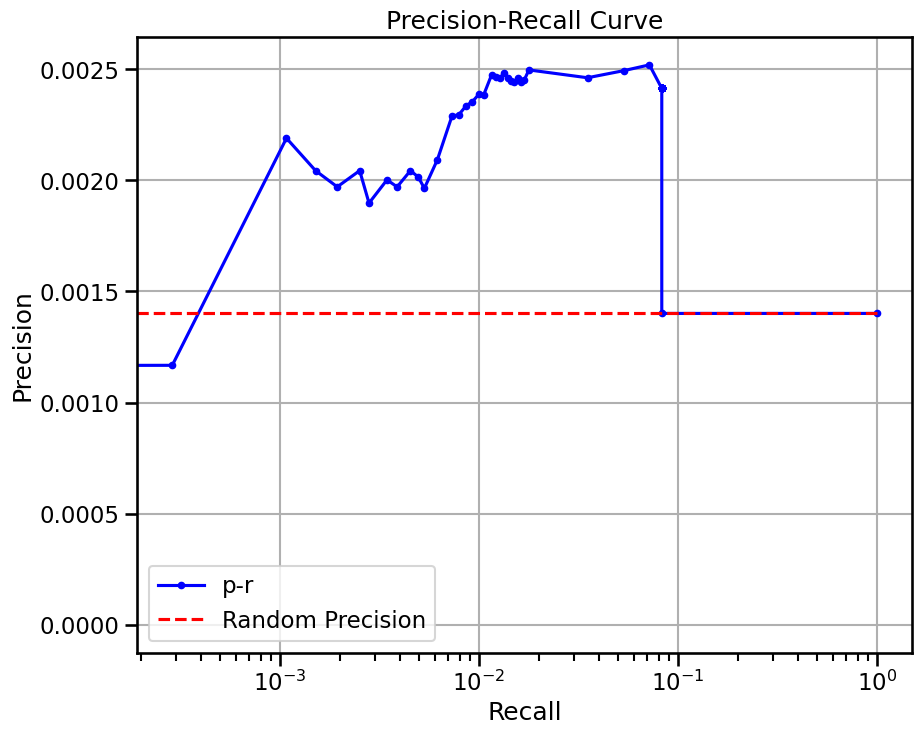

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 34.16 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


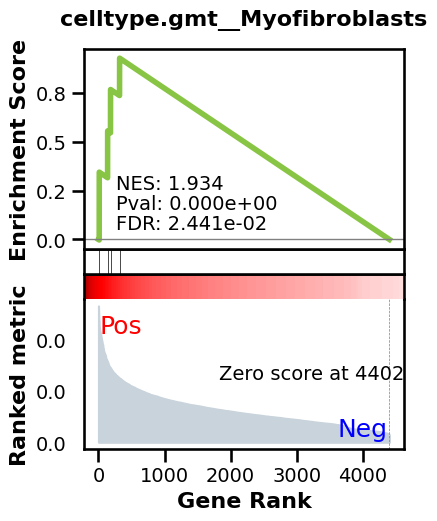

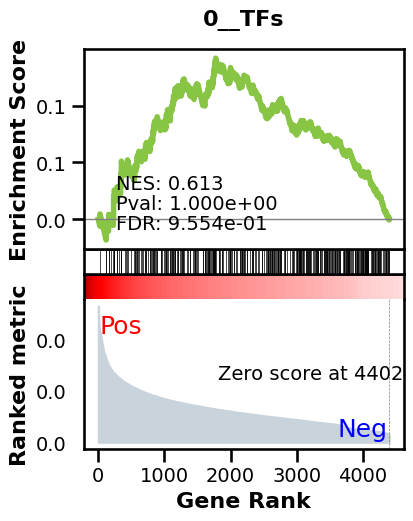

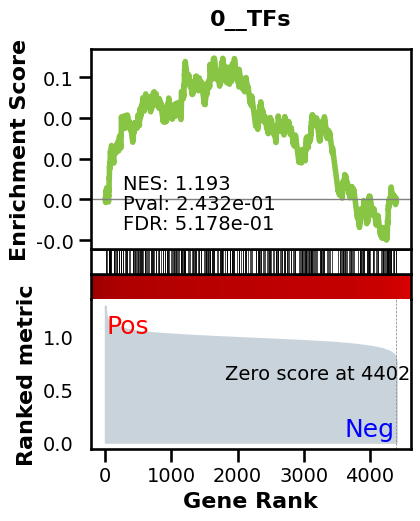

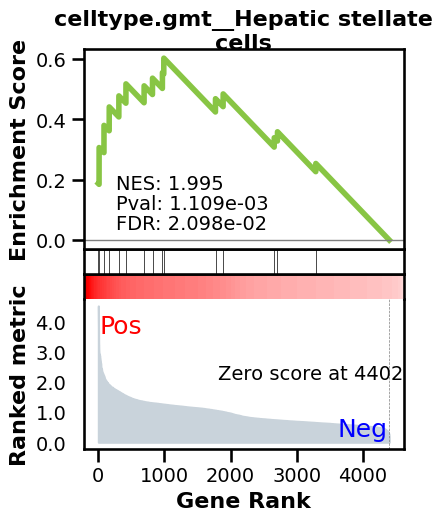

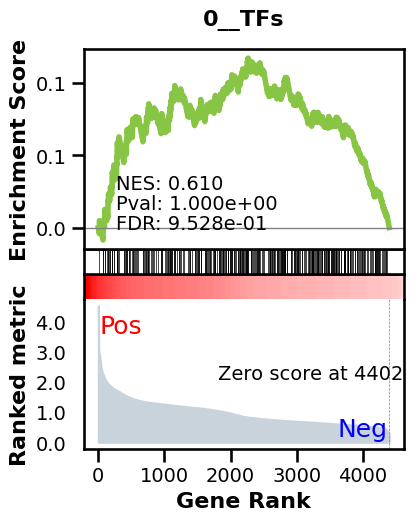

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.0018570629512236984 
recall:  0.10809256863590629 
random precision: 0.001400933069350315


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.77it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.77it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.87it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.87it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.95it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.92it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.61it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.78it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.84it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.79it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.77it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.88it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.83it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.88it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.83it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.88it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.91it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.96it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.64it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.63it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014196390159393255
EPR: 0.7176540137674033


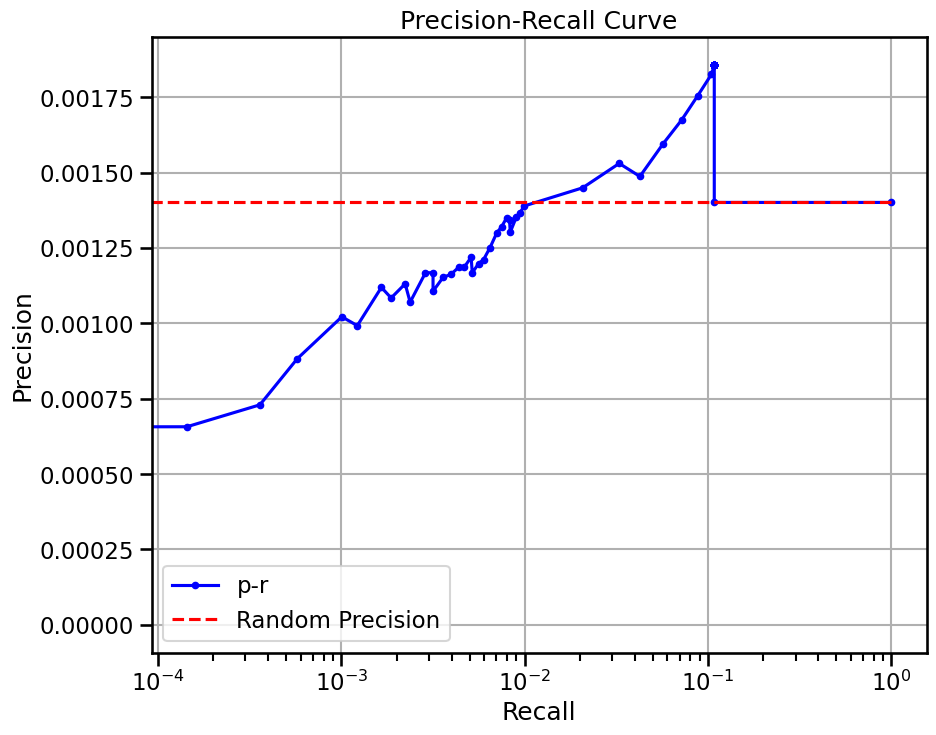

leukocyte

View of AnnData object with n_obs × n_vars = 996 × 2766
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'l

Elapsed time: 28.86 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


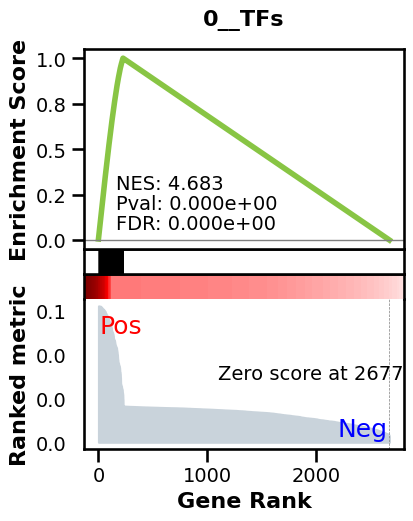

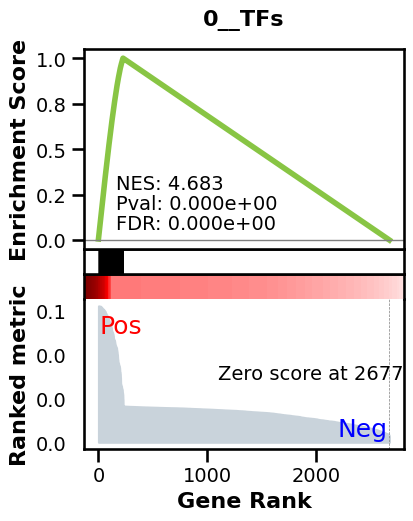

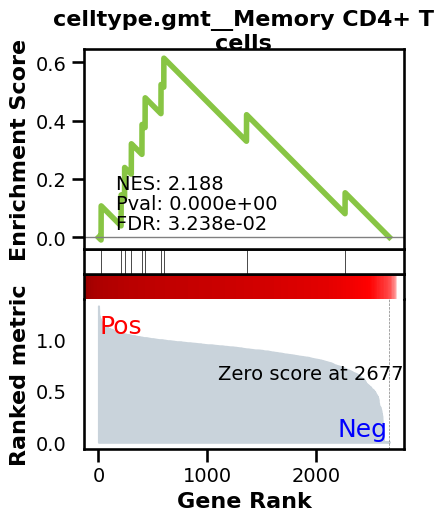

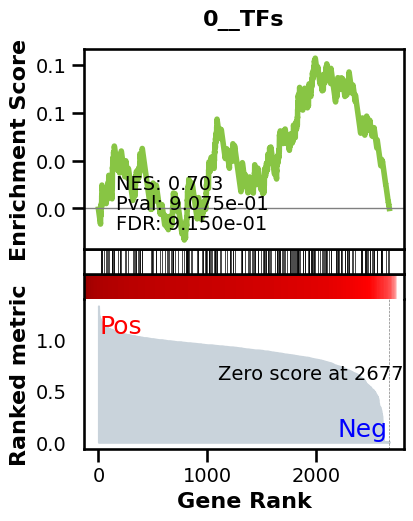

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.0017847652438782553 
recall:  0.09778357235984354 
random precision: 0.001419581713862669


  0%|          | 0/128 [00:00<?, ?it/s]

 14%|█▍        | 18/128 [00:00<00:00, 178.04it/s]

 28%|██▊       | 36/128 [00:00<00:00, 176.03it/s]

 42%|████▏     | 54/128 [00:00<00:00, 176.04it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 175.55it/s]

 70%|███████   | 90/128 [00:00<00:00, 175.96it/s]

 84%|████████▍ | 108/128 [00:00<00:00, 176.08it/s]

 98%|█████████▊| 126/128 [00:00<00:00, 176.10it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 175.77it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015433115608003089
EPR: 2.4592657567762024


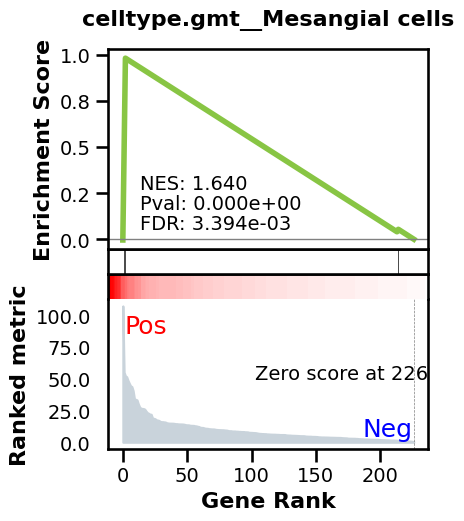

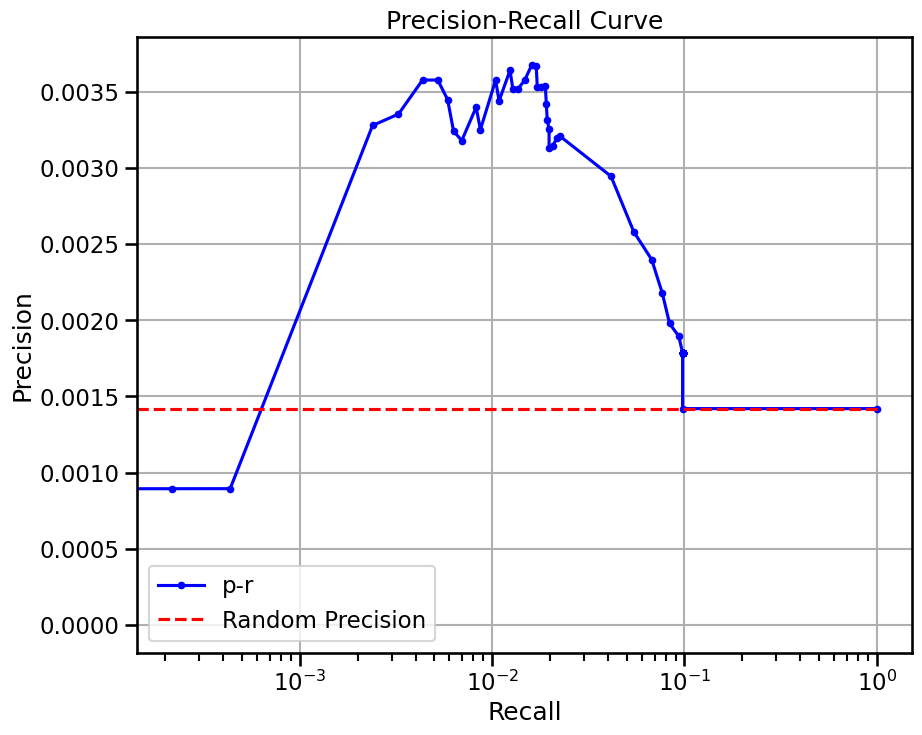

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 41.23 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


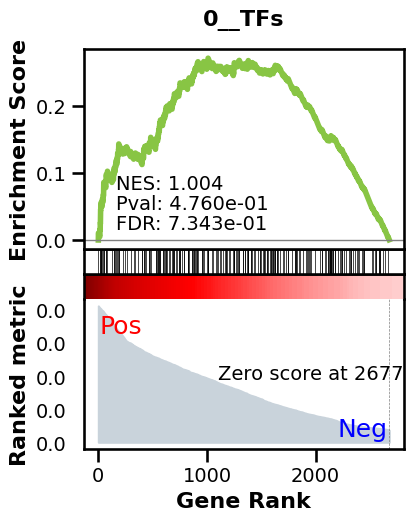

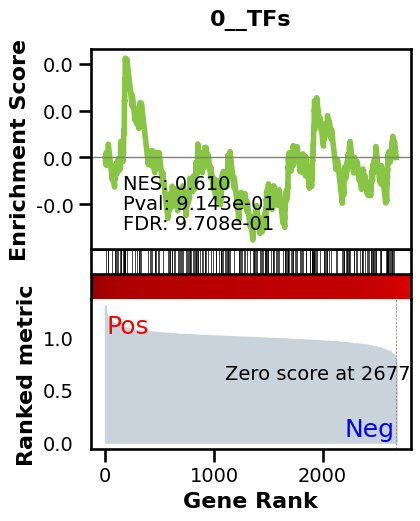

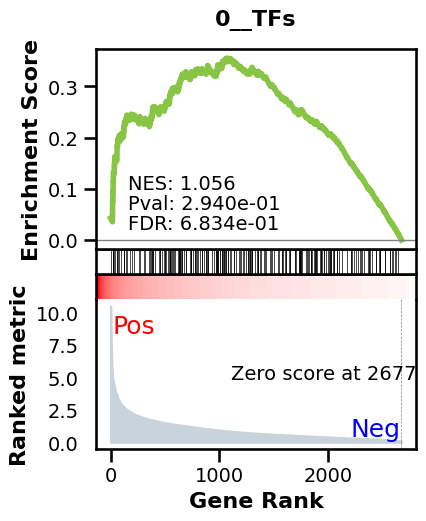

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.00177311690629035 
recall:  0.2742285962624946 
random precision: 0.001419581713862669


  0%|          | 0/128 [00:00<?, ?it/s]

 13%|█▎        | 17/128 [00:00<00:00, 168.86it/s]

 27%|██▋       | 34/128 [00:00<00:00, 168.98it/s]

 40%|███▉      | 51/128 [00:00<00:00, 169.22it/s]

 53%|█████▎    | 68/128 [00:00<00:00, 169.23it/s]

 66%|██████▋   | 85/128 [00:00<00:00, 168.71it/s]

 80%|███████▉  | 102/128 [00:00<00:00, 168.84it/s]

 93%|█████████▎| 119/128 [00:00<00:00, 168.74it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 168.57it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001556474958541485
EPR: 1.5330242187594847


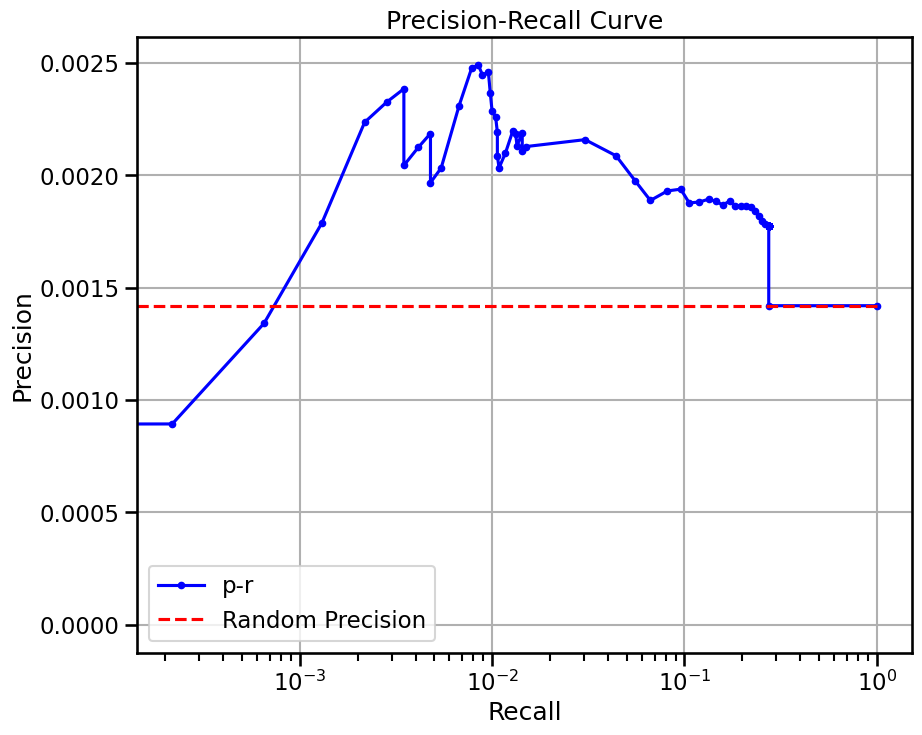

kidney interstitial fibroblast

View of AnnData object with n_obs × n_vars = 468 × 4008
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outli

Elapsed time: 35.41 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


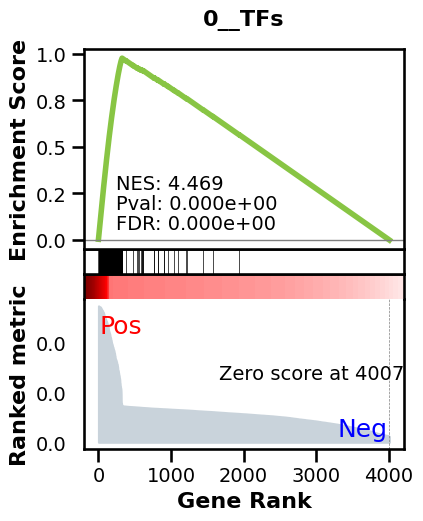

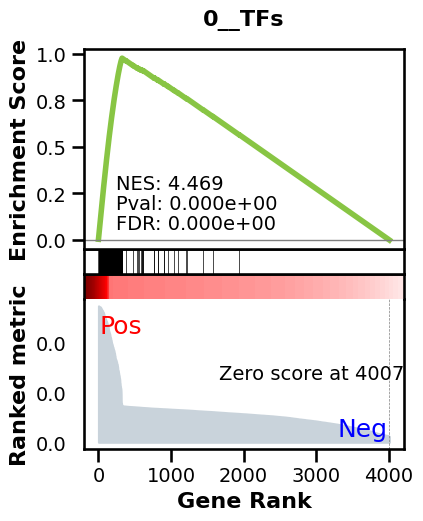

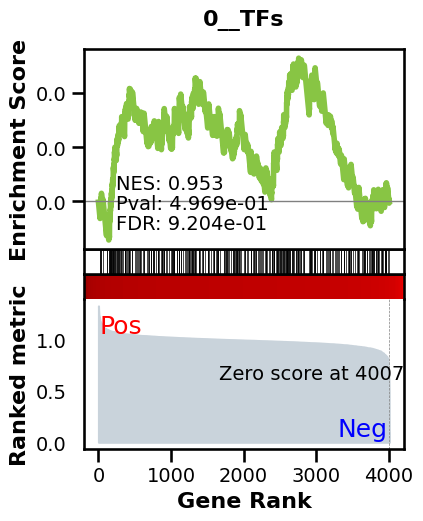

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.0029158429207200775 
recall:  0.12677976370796729 
random precision: 0.0016125679668576004


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 65.44it/s]

 11%|█         | 14/128 [00:00<00:01, 65.66it/s]

 16%|█▋        | 21/128 [00:00<00:01, 65.90it/s]

 22%|██▏       | 28/128 [00:00<00:01, 65.87it/s]

 27%|██▋       | 35/128 [00:00<00:01, 65.92it/s]

 33%|███▎      | 42/128 [00:00<00:01, 65.92it/s]

 38%|███▊      | 49/128 [00:00<00:01, 65.85it/s]

 44%|████▍     | 56/128 [00:00<00:01, 65.86it/s]

 49%|████▉     | 63/128 [00:00<00:00, 65.75it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 65.79it/s]

 60%|██████    | 77/128 [00:01<00:00, 65.73it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 65.74it/s]

 71%|███████   | 91/128 [00:01<00:00, 65.73it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 65.73it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 65.69it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 65.71it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 65.77it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 65.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 65.71it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0018597956567689938
EPR: 2.168528230129532


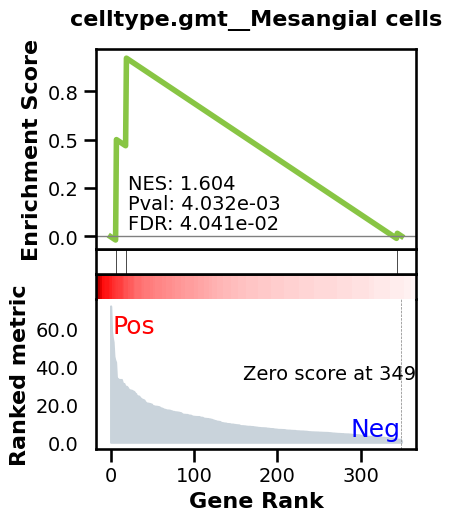

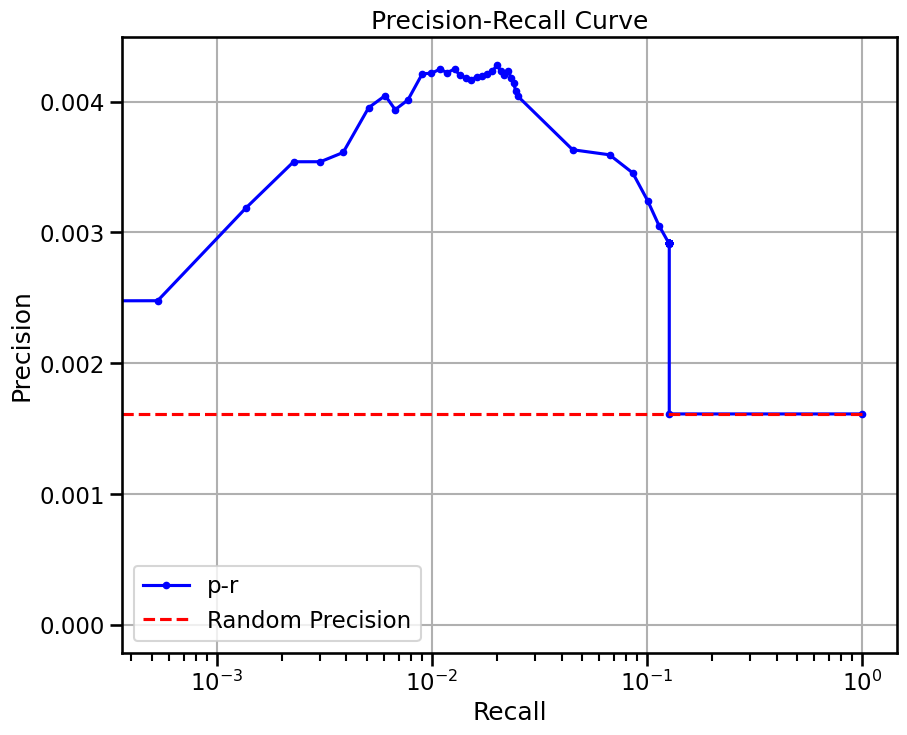

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 50.58 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


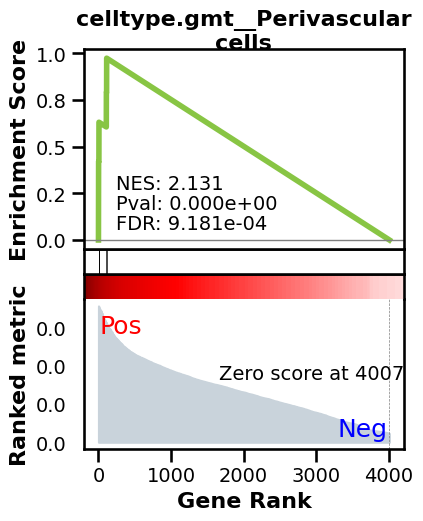

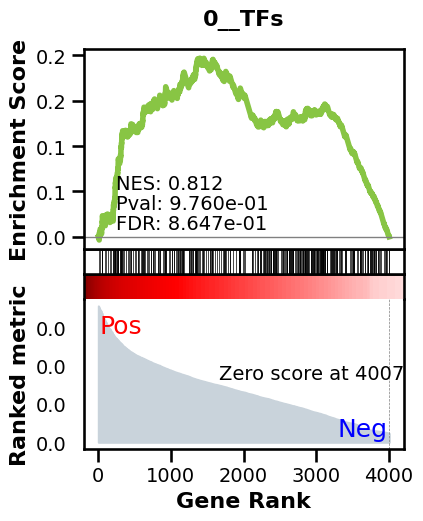

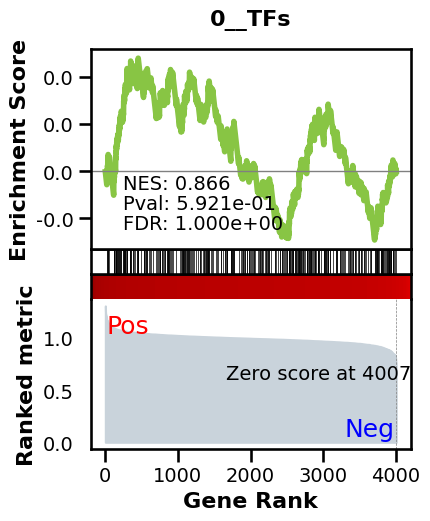

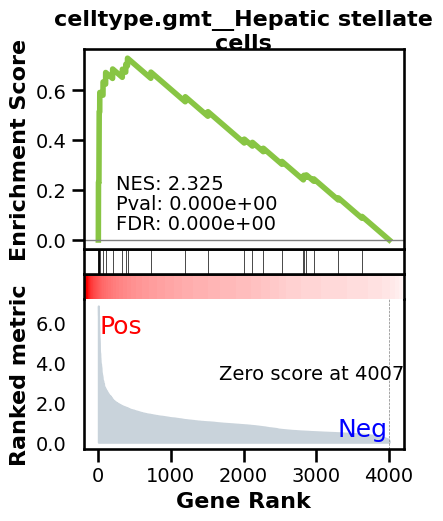

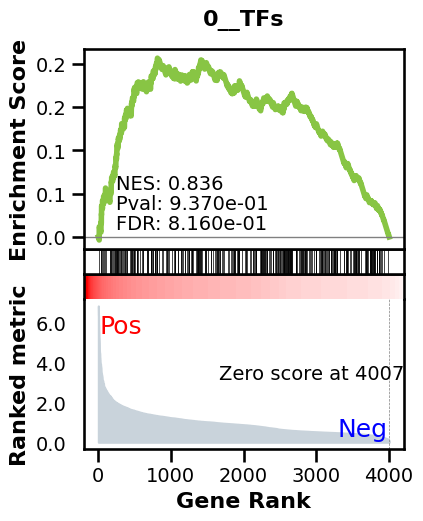

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.002370142667956 
recall:  0.3164950015146925 
random precision: 0.0016125679668576004


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 65.84it/s]

 11%|█         | 14/128 [00:00<00:01, 65.95it/s]

 16%|█▋        | 21/128 [00:00<00:01, 65.97it/s]

 22%|██▏       | 28/128 [00:00<00:01, 66.02it/s]

 27%|██▋       | 35/128 [00:00<00:01, 65.95it/s]

 33%|███▎      | 42/128 [00:00<00:01, 65.92it/s]

 38%|███▊      | 49/128 [00:00<00:01, 65.83it/s]

 44%|████▍     | 56/128 [00:00<00:01, 65.84it/s]

 49%|████▉     | 63/128 [00:00<00:00, 65.88it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 65.93it/s]

 60%|██████    | 77/128 [00:01<00:00, 65.75it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 65.63it/s]

 71%|███████   | 91/128 [00:01<00:00, 65.53it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 65.51it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 65.58it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 65.65it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 65.72it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 65.71it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:749: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 65.73it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017853236728463994
EPR: 1.2691608706068176


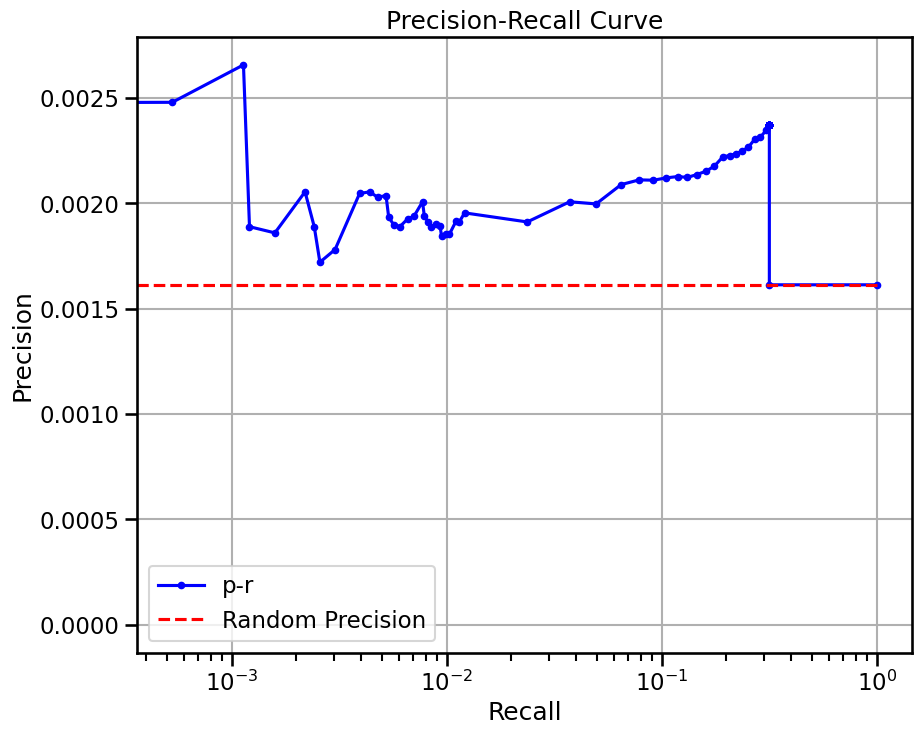

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(
        genes) & adata.var.index.isin(to_use)]
    print(celltype)
    print("")
    print(subadata)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    genie_grn.varp['GRN'] = genie_grn.varp['GRN'].T
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.varp['GRN'] = genie_grn.varp['GRN'].T
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [9]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Hepatoblasts',
   'celltype.gmt__Mesangial cells'],
  'TF_enr': True,
  'enriched_terms_Regulators': ['celltype.gmt__Melanocytes'],
  'significant_enriched_TFtargets': 3.225806451612903,
  'precision': 0.001367301675574015,
  'recall': 0.09802998194804176,
  'rand_precision': 0.001085814360770578,
  'auprc': 0.0011451348638748498,
  'epr': 1.8102713577453327},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Hepatic stell

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name       EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell  1.810271  0.001145   
1     kidney distal convoluted tubule epithelial cell  1.447078  0.001155   
2   kidney loop of Henle thick ascending limb epit...  1.777899  0.001273   
3   kidney loop of Henle thick ascending limb epit...  0.550126  0.001249   
4               kidney collecting duct principal cell  2.495843  0.001548   
5               kidney collecting duct principal cell  1.349383  0.001464   
6                                      mesangial cell  1.975958  0.001279   
7                                      mesangial cell  1.220962  0.001236   
8                     blood vessel smooth muscle cell  2.342706  0.001854   
9                     blood vessel smooth muscle cell  1.148832  0.001790   
10                                           podocyte  1.387845  0.001607   
11                                           podocyte  1.173566  0.001590   
12                                         macrophage  1.438206  0.001486   
13                                         macrophage  0.717654  0.001420   
14                                          leukocyte  2.459266  0.001543   
15                                          leukocyte  1.533024  0.001556   
16                     kidney interstitial fibroblast  2.168528  0.001860   
17                     kidney interstitial fibroblast  1.269161  0.001785   

        RAND   TF_targ  TF_enr  TF_only  
0   0.001086  3.225806    True     True  
1   0.001086  3.225806   False    False  
2   0.001211  5.000000    True     True  
3   0.001211  5.000000   False    False  
4   0.001392  1.428571    True     True  
5   0.001392  4.285714   False    False  
6   0.001223  0.000000    True     True  
7   0.001223  7.142857   False    False  
8   0.001645  1.886792    True     True  
9   0.001645  1.886792   False    False  
10  0.001521  0.000000    True     True  
11  0.001521  0.000000   False    False  
12  0.001401  4.878049    True     True  
13  0.001401  0.000000   False    False  
14  0.001420  0.000000    True     True  
15  0.001420  0.000000   False    False  
16  0.001613  0.000000    True     True  
17  0.001613  0.000000   False    False